# Exploratory Data Analysis (EDA) for Loan Default 

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#Set max to se full text
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 111)
pd.options.display.max_columns = None

In [3]:
#Loading the data
loan=pd.read_csv("loan.csv",low_memory=False)
#making another copy to later compare the loss of data
master=pd.read_csv("loan.csv",low_memory=False)



In [4]:
#Viewing the data
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#finding no of rows
rows=len(loan.index)
print(rows)

39717


In [6]:
#Getting the information about dataframes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#Check the data types for all the columns
print(loan.dtypes)

id                                int64  
member_id                         int64  
loan_amnt                         int64  
funded_amnt                       int64  
funded_amnt_inv                   float64
term                              object 
int_rate                          object 
installment                       float64
grade                             object 
sub_grade                         object 
emp_title                         object 
emp_length                        object 
home_ownership                    object 
annual_inc                        float64
verification_status               object 
issue_d                           object 
loan_status                       object 
pymnt_plan                        object 
url                               object 
desc                              object 
purpose                           object 
title                             object 
zip_code                          object 
addr_state                        

In [8]:
#Confirming if the Id column is the unique and can act as a primary key
print("Id Count-",loan["id"].count())
print("Unique Count-",len(loan["id"].unique()))

Id Count- 39717
Unique Count- 39717


In [9]:
#Checking missing values in loan
loan.isnull().sum()

id                                0    
member_id                         0    
loan_amnt                         0    
funded_amnt                       0    
funded_amnt_inv                   0    
term                              0    
int_rate                          0    
installment                       0    
grade                             0    
sub_grade                         0    
emp_title                         2459 
emp_length                        1075 
home_ownership                    0    
annual_inc                        0    
verification_status               0    
issue_d                           0    
loan_status                       0    
pymnt_plan                        0    
url                               0    
desc                              12940
purpose                           0    
title                             11   
zip_code                          0    
addr_state                        0    
dti                               0    


In [10]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.71  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
url                               0.00  
desc                              32.58 
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00  
dti             

### Observation : Many columns have null values for all the rows
### Cleaning the data

In [11]:
#Get the columns in which are all values are null
nan_columns=list(loan.columns[loan.isnull().sum()==rows])
print(nan_columns)


['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [12]:
#check if any row has all the values as null
loan.isnull().all(axis=1).sum()

0

In [13]:
#drop the null columns
loan = loan.drop(nan_columns, axis=1)

In [14]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                     6.19 
emp_length                    2.71 
pub_rec_bankruptcies          1.75 
last_pymnt_d                  0.18 
chargeoff_within_12_mths      0.14 
collections_12_mths_ex_med    0.14 
revol_util                    0.13 
tax_liens                     0.10 
title                         0.03 
last_credit_pull_d            0.01 
collection_recovery_fee       0.00 
acc_now_delinq                0.00 
application_type              0.00 
url                           0.00 
pymnt_plan                    0.00 
loan_status                   0.00 
issue_d                       0.00 
verification_status           0.00 
annual_inc                    0.00 
home_ownership                0.00 
delinq_amnt                   0.00 
sub_grade                     0.00 
grade                         0.00 
installment                 

#### The columns next_pymnt_d and mths_since_last_record have null values more than 90%, hence removing them ,
#### as it won't give any information.

In [15]:
#dropping the other columns which have high percentage of null values
loan = loan.drop(['mths_since_last_record','next_pymnt_d'], axis=1)

In [16]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

mths_since_last_delinq        64.66
desc                          32.58
emp_title                     6.19 
emp_length                    2.71 
pub_rec_bankruptcies          1.75 
last_pymnt_d                  0.18 
chargeoff_within_12_mths      0.14 
collections_12_mths_ex_med    0.14 
revol_util                    0.13 
tax_liens                     0.10 
title                         0.03 
last_credit_pull_d            0.01 
term                          0.00 
loan_status                   0.00 
purpose                       0.00 
member_id                     0.00 
loan_amnt                     0.00 
funded_amnt                   0.00 
url                           0.00 
pymnt_plan                    0.00 
funded_amnt_inv               0.00 
issue_d                       0.00 
int_rate                      0.00 
verification_status           0.00 
annual_inc                    0.00 
home_ownership                0.00 
addr_state                    0.00 
sub_grade                   

### Treating the null values

##### Column mths_since_last_delinq has highest no of null values now.

In [17]:
# Cheking the data range in mths_since_last_delinq
loan["mths_since_last_delinq"].describe()

count    14035.000000
mean     35.900962   
std      22.020060   
min      0.000000    
25%      18.000000   
50%      34.000000   
75%      52.000000   
max      120.000000  
Name: mths_since_last_delinq, dtype: float64

In [18]:
#Reading values for mths_since_last_delinq as category
mths_since_last_delinq=loan["mths_since_last_delinq"].astype("category")

In [19]:
#Checking the frequency of top 20 to see the distribution
mths_since_last_delinq.value_counts().head(20)

0.0     443
15.0    252
30.0    247
23.0    247
24.0    241
19.0    238
38.0    237
20.0    233
18.0    231
22.0    231
31.0    229
35.0    227
32.0    226
39.0    224
25.0    223
45.0    222
26.0    217
37.0    217
21.0    216
17.0    214
Name: mths_since_last_delinq, dtype: int64

In [20]:
#Checking the frequency of last 20 to see the distribution
mths_since_last_delinq.value_counts().tail(20)

78.0     99
64.0     97
80.0     93
65.0     92
81.0     91
77.0     88
82.0     54
1.0      30
83.0     5 
103.0    2 
86.0     2 
106.0    1 
97.0     1 
107.0    1 
96.0     1 
115.0    1 
95.0     1 
89.0     1 
85.0     1 
120.0    1 
Name: mths_since_last_delinq, dtype: int64

In [21]:
# viewing fractions of mths_since_last_delinq
100*(loan['mths_since_last_delinq'].value_counts()/len(loan.index)).head(20)

0.0     1.115391
15.0    0.634489
30.0    0.621900
23.0    0.621900
24.0    0.606793
19.0    0.599240
38.0    0.596722
20.0    0.586651
18.0    0.581615
22.0    0.581615
31.0    0.576579
35.0    0.571544
32.0    0.569026
39.0    0.563990
25.0    0.561472
45.0    0.558955
26.0    0.546366
37.0    0.546366
21.0    0.543848
16.0    0.538812
Name: mths_since_last_delinq, dtype: float64

In [22]:
#Substituing the 0 values for the column mths_since_last_delinq
loan['mths_since_last_delinq']=loan['mths_since_last_delinq'].fillna(0)

In [23]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

desc                          32.58
emp_title                     6.19 
emp_length                    2.71 
pub_rec_bankruptcies          1.75 
last_pymnt_d                  0.18 
chargeoff_within_12_mths      0.14 
collections_12_mths_ex_med    0.14 
revol_util                    0.13 
tax_liens                     0.10 
title                         0.03 
last_credit_pull_d            0.01 
term                          0.00 
issue_d                       0.00 
member_id                     0.00 
purpose                       0.00 
loan_amnt                     0.00 
url                           0.00 
pymnt_plan                    0.00 
funded_amnt                   0.00 
loan_status                   0.00 
verification_status           0.00 
annual_inc                    0.00 
home_ownership                0.00 
funded_amnt_inv               0.00 
addr_state                    0.00 
sub_grade                     0.00 
grade                         0.00 
installment                 

In [24]:
#Cheking the values of next columns with high null values

loan['desc'].head()

0      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [25]:
#Cheking the value for emp_title
loan['emp_title'].value_counts()

US Army                                     134
Bank of America                             109
IBM                                         66 
AT&T                                        59 
Kaiser Permanente                           56 
Wells Fargo                                 54 
USAF                                        54 
UPS                                         53 
US Air Force                                52 
Walmart                                     45 
Lockheed Martin                             44 
State of California                         42 
United States Air Force                     42 
U.S. Army                                   41 
Self Employed                               40 
Verizon Wireless                            40 
US ARMY                                     39 
USPS                                        39 
Walgreens                                   38 
JP Morgan Chase                             37 
Department of Defense                   

#### Dropping the columns desc and emp_title as they are not required for the analysis

In [26]:
#dropping the columns
loan = loan.drop(['desc','emp_title'], axis=1)

In [27]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
url                           0.00
annual_inc                    0.00
purpose                       0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
zip_code                      0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
dti                           0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
addr_state          

In [28]:
#Checking the emp_length data
loan['emp_length'].describe()

count     38642    
unique    11       
top       10+ years
freq      8879     
Name: emp_length, dtype: object

In [29]:
#Frequency of data
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [30]:
loan['emp_length']

0        10+ years
1        < 1 year 
2        10+ years
3        10+ years
4        1 year   
5        3 years  
6        8 years  
7        9 years  
8        4 years  
9        < 1 year 
10       5 years  
11       10+ years
12       < 1 year 
13       3 years  
14       3 years  
15       < 1 year 
16       4 years  
17       10+ years
18       1 year   
19       6 years  
20       3 years  
21       10+ years
22       10+ years
23       5 years  
24       1 year   
25       2 years  
26       9 years  
27       2 years  
28       10+ years
29       < 1 year 
30       7 years  
31       5 years  
32       2 years  
33       2 years  
34       7 years  
35       10+ years
36       2 years  
37       1 year   
38       1 year   
39       1 year   
40       4 years  
41       10+ years
42       9 years  
43       10+ years
44       10+ years
45       6 years  
46       10+ years
47       6 years  
48       10+ years
49       5 years  
50       8 years  
51       9 years  
52       < 1

In [31]:
#Removing null values
loan=loan[~pd.isnull(loan['emp_length'])]

In [32]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

pub_rec_bankruptcies          1.80
last_pymnt_d                  0.17
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.12
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
zip_code                      0.00
purpose                       0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
emp_length                    0.00
dti                           0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
addr_state          

In [33]:
#cheking pub_rec_bankruptcies data
loan['pub_rec_bankruptcies'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [34]:
#cheking pub_rec_bankruptcies distribution
loan['pub_rec_bankruptcies'].describe()

count    37945.000000
mean     0.041560    
std      0.200507    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      2.000000    
Name: pub_rec_bankruptcies, dtype: float64

In [35]:
#Frequency of data
loan['pub_rec_bankruptcies'].value_counts()

0.0    36375
1.0    1563 
2.0    7    
Name: pub_rec_bankruptcies, dtype: int64

In [36]:
# % of frequency 
100*(loan['pub_rec_bankruptcies'].value_counts()/len(loan.index))

0.0    94.133326
1.0    4.044822 
2.0    0.018115 
Name: pub_rec_bankruptcies, dtype: float64

In [37]:
#Imputing 0 as its 94%
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(0)

In [38]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

last_pymnt_d                  0.17
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.12
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
addr_state                    0.00
zip_code                      0.00
purpose                       0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
emp_length                    0.00
delinq_2yrs                   0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
dti                 

In [39]:
loan['last_pymnt_d'].head()    

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object

In [40]:
#Cheking the data distribution
loan['last_pymnt_d'].describe()

count     38576 
unique    101   
top       May-16
freq      1209  
Name: last_pymnt_d, dtype: object

In [41]:
# Frequency of data
loan['last_pymnt_d'].value_counts().head(20)

May-16    1209
Mar-13    1001
Dec-14    911 
May-13    884 
Feb-13    846 
Mar-12    828 
Apr-13    822 
Aug-12    811 
Oct-12    809 
Mar-14    805 
Jan-14    801 
Aug-14    797 
Jul-14    793 
Oct-14    778 
Jan-13    769 
Feb-14    768 
Dec-13    758 
Sep-12    753 
Jul-13    750 
Jun-14    744 
Name: last_pymnt_d, dtype: int64

In [42]:
#Removing null values
loan=loan[~pd.isnull(loan['last_pymnt_d'])]

In [43]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

chargeoff_within_12_mths      0.15
collections_12_mths_ex_med    0.15
revol_util                    0.11
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
addr_state                    0.00
zip_code                      0.00
purpose                       0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
emp_length                    0.00
home_ownership                0.00
delinq_2yrs                   0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
dti                           0.00
mths_since_last_deli

In [44]:
#Cheking the data distribution
loan['chargeoff_within_12_mths'].describe()

count    38520.0
mean     0.0    
std      0.0    
min      0.0    
25%      0.0    
50%      0.0    
75%      0.0    
max      0.0    
Name: chargeoff_within_12_mths, dtype: float64

In [45]:
# Frequency of data
loan['chargeoff_within_12_mths'].value_counts()

0.0    38520
Name: chargeoff_within_12_mths, dtype: int64

In [46]:
#dropping the column as column has only 0 values
loan=loan.drop('chargeoff_within_12_mths',axis=1)

In [47]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

collections_12_mths_ex_med    0.15
revol_util                    0.11
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
addr_state                    0.00
zip_code                      0.00
purpose                       0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
emp_length                    0.00
home_ownership                0.00
delinq_2yrs                   0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
dti                           0.00
inq_last_6mths                0.00
earliest_cr_line    

In [48]:
# Cheking the data distribution o
loan['collections_12_mths_ex_med'].describe()

count    38520.0
mean     0.0    
std      0.0    
min      0.0    
25%      0.0    
50%      0.0    
75%      0.0    
max      0.0    
Name: collections_12_mths_ex_med, dtype: float64

In [49]:
loan['collections_12_mths_ex_med'].value_counts()

0.0    38520
Name: collections_12_mths_ex_med, dtype: int64

In [50]:
#dropping the column collections_12_mths_ex_med as column has only 0 values
loan=loan.drop('collections_12_mths_ex_med',axis=1)

In [51]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

revol_util                 0.11
tax_liens                  0.10
title                      0.03
last_credit_pull_d         0.01
annual_inc                 0.00
addr_state                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
pymnt_plan                 0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
home_ownership             0.00
delinq_2yrs                0.00
emp_length                 0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
dti                        0.00
inq_last_6mths             0.00
earliest_cr_line           0.00
pub_rec_bankruptcies       0.00
delinq_amnt                0.00
acc_now_delinq             0.00
applicat

In [52]:
#Checing the distrubtion
loan['revol_util'].describe()

count     38533
unique    1087 
top       0%   
freq      939  
Name: revol_util, dtype: object

In [53]:
# Frequency of data
loan['revol_util'].value_counts()

0%        939
0.20%     61 
63%       61 
66.70%    57 
40.70%    57 
61%       56 
0.10%     56 
66.60%    56 
70.40%    55 
64.80%    55 
37.60%    55 
31.20%    55 
46.40%    55 
78.70%    54 
32%       54 
48.90%    54 
68.60%    54 
68.70%    53 
70.80%    53 
27.20%    53 
57.40%    53 
51.60%    53 
62.80%    53 
46.60%    53 
76.60%    53 
25.50%    53 
65.90%    53 
64.60%    52 
41%       52 
48%       52 
54.30%    52 
55.80%    52 
45.60%    52 
49.80%    52 
70.10%    52 
51.50%    52 
75.50%    52 
89.50%    52 
55.50%    51 
35.70%    51 
74.90%    51 
66.10%    51 
55.10%    51 
48.20%    51 
66.90%    51 
41.60%    51 
54.60%    51 
35.30%    51 
45.90%    50 
64.30%    50 
88%       50 
29.10%    50 
44.70%    50 
60.20%    50 
72.10%    50 
          .. 
25.33%    1  
43.61%    1  
0.49%     1  
29.77%    1  
62.31%    1  
38.77%    1  
18.82%    1  
24.63%    1  
24.66%    1  
36.88%    1  
13.56%    1  
60.69%    1  
34.89%    1  
37.63%    1  
57.56%    1  
10.08%

In [54]:
# Removing the data s its just 0.11 %
loan=loan[~pd.isnull(loan['revol_util'])]

In [55]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

tax_liens                  0.10
title                      0.03
last_credit_pull_d         0.01
annual_inc                 0.00
dti                        0.00
addr_state                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
pymnt_plan                 0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
home_ownership             0.00
earliest_cr_line           0.00
emp_length                 0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
pub_rec_bankruptcies       0.00
mths_since_last_delinq     0.00
delinq_amnt                0.00
acc_now_delinq             0.00
applicat

In [56]:
#Checing the distrubtion
loan['tax_liens'].describe()

count    38494.0
mean     0.0    
std      0.0    
min      0.0    
25%      0.0    
50%      0.0    
75%      0.0    
max      0.0    
Name: tax_liens, dtype: float64

In [57]:
# Frequency of data
loan['tax_liens'].value_counts()

0.0    38494
Name: tax_liens, dtype: int64

In [58]:
#dropping the column tax_liens as column has only 0 values
loan=loan.drop('tax_liens',axis=1)

In [59]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

title                      0.03
last_credit_pull_d         0.01
pub_rec_bankruptcies       0.00
home_ownership             0.00
addr_state                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
pymnt_plan                 0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
annual_inc                 0.00
emp_length                 0.00
delinq_2yrs                0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
dti                        0.00
earliest_cr_line           0.00
delinq_amnt                0.00
inq_last_6mths             0.00
acc_now_delinq             0.00
application_type           0.00
policy_code                0.00
last_pym

In [60]:
#Viewing the data
loan['title'].head(20)

0     Computer                             
1     bike                                 
2     real estate business                 
3     personel                             
4     Personal                             
5     My wedding loan I promise to pay back
6     Loan                                 
7     Car Downpayment                      
8     Expand Business & Buy Debt Portfolio 
9     Building my credit history.          
10    High intrest Consolidation           
11    Consolidation                        
12    freedom                              
13    citicard fund                        
14    Other Loan                           
15    Debt Consolidation Loan              
16    Home                                 
17    Holiday                              
18    Medical                              
19    lowerratemeanseasiertogetoutofdebt!  
Name: title, dtype: object

In [61]:
# Frequency of data
loan['title'].value_counts()

Debt Consolidation                                                                2140
Debt Consolidation Loan                                                           1687
Personal Loan                                                                     639 
Consolidation                                                                     509 
debt consolidation                                                                486 
Credit Card Consolidation                                                         348 
Home Improvement                                                                  345 
Debt consolidation                                                                324 
Small Business Loan                                                               315 
Credit Card Loan                                                                  306 
Personal                                                                          296 
Consolidation Loan                         

In [62]:
#Dropping the column as its not required
loan=loan.drop('title',axis=1)

In [63]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

last_credit_pull_d         0.01
pub_rec_bankruptcies       0.00
home_ownership             0.00
dti                        0.00
addr_state                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
pymnt_plan                 0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
annual_inc                 0.00
emp_length                 0.00
earliest_cr_line           0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
delinq_amnt                0.00
total_rec_prncp            0.00
acc_now_delinq             0.00
application_type           0.00
policy_code                0.00
last_pym

In [64]:
#Checing the distrubtion
loan['last_credit_pull_d'].describe()

count     38531 
unique    106   
top       May-16
freq      10036 
Name: last_credit_pull_d, dtype: object

In [65]:
# Frequency of data
loan['last_credit_pull_d'].value_counts()

May-16    10036
Apr-16    2476 
Mar-16    1094 
Feb-13    831  
Feb-16    714  
Jan-16    639  
Dec-15    625  
Mar-13    560  
Mar-14    544  
Dec-14    538  
Jul-14    534  
Jul-15    519  
Sep-14    519  
Feb-14    514  
Nov-15    512  
Oct-14    507  
Sep-15    500  
Aug-14    498  
Jan-14    495  
Oct-15    489  
Apr-14    482  
Nov-14    478  
Nov-13    454  
May-14    453  
Jun-14    441  
May-13    438  
Jan-15    428  
May-15    418  
Apr-13    414  
Aug-15    412  
Dec-13    412  
Oct-13    401  
Nov-12    392  
Sep-12    383  
Jul-13    382  
Sep-13    377  
Apr-15    373  
Jun-15    370  
Dec-12    362  
Mar-15    362  
Aug-13    361  
Aug-12    361  
Jun-13    358  
Feb-12    352  
Feb-15    344  
Mar-12    326  
Oct-12    325  
May-12    317  
Apr-12    300  
Jun-12    295  
Jul-12    289  
Jan-12    251  
Mar-11    251  
Aug-11    244  
Dec-11    235  
Nov-11    189  
May-11    184  
Jun-11    162  
Sep-11    155  
Jul-11    149  
Feb-11    148  
Oct-11    140  
Apr-11  

In [66]:
# Removing the data its just 0.01 %
loan=loan[~pd.isnull(loan['last_credit_pull_d'])]

In [67]:
# re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

pub_rec_bankruptcies       0.0
earliest_cr_line           0.0
dti                        0.0
addr_state                 0.0
zip_code                   0.0
purpose                    0.0
url                        0.0
pymnt_plan                 0.0
loan_status                0.0
issue_d                    0.0
verification_status        0.0
annual_inc                 0.0
home_ownership             0.0
emp_length                 0.0
sub_grade                  0.0
grade                      0.0
installment                0.0
int_rate                   0.0
term                       0.0
funded_amnt_inv            0.0
funded_amnt                0.0
loan_amnt                  0.0
member_id                  0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
delinq_amnt                0.0
mths_since_last_delinq     0.0
acc_now_delinq             0.0
application_type           0.0
policy_code                0.0
last_credit_pull_d         0.0
last_pymnt_amnt            0.0
last_pym

#### Now we have without any null values.

In [68]:
## We retained 97% of data.
100*(len(loan.index) / len(master.index))

97.01387315255432

### Removing the column which are not required

In [69]:
#Viewing the data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [70]:
#There are multiple columns which have same value, hence it may not effect the analysis.
loan.nunique().sort_values()

acc_now_delinq             1    
application_type           1    
policy_code                1    
initial_list_status        1    
delinq_amnt                1    
pymnt_plan                 1    
term                       2    
pub_rec_bankruptcies       3    
loan_status                3    
verification_status        3    
pub_rec                    5    
home_ownership             5    
grade                      7    
inq_last_6mths             9    
emp_length                 11   
delinq_2yrs                11   
purpose                    14   
sub_grade                  35   
open_acc                   40   
addr_state                 50   
issue_d                    55   
total_acc                  82   
mths_since_last_delinq     95   
last_pymnt_d               101  
last_credit_pull_d         106  
int_rate                   371  
earliest_cr_line           515  
zip_code                   822  
loan_amnt                  879  
funded_amnt                1037 
revol_util

In [71]:
#Getting the same value columns
same_Value_columns=list(loan.columns[loan.nunique()==1])

In [72]:
# Column names
print(same_Value_columns)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [73]:
# Checking the data
loan[same_Value_columns].head()

,pymnt_plan,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt
0,n,f,1,INDIVIDUAL,0,0
1,n,f,1,INDIVIDUAL,0,0
2,n,f,1,INDIVIDUAL,0,0
3,n,f,1,INDIVIDUAL,0,0
4,n,f,1,INDIVIDUAL,0,0


In [74]:
#Dropping the columns
loan = loan.drop(same_Value_columns, axis=1)

### Data Manipulation

In [75]:
#Emp_length Value by removing the years and other characters
loan['emp_length_val']=loan['emp_length'].apply(lambda x:x.strip(' years').strip('< ').strip(' +'))

In [76]:
#Converting data type to int
loan['emp_length_val']=loan['emp_length_val'].astype(int)

In [77]:
#Cheking the data distribution
loan['emp_length_val'].describe()

count    38531.000000
mean     5.095430    
std      3.409046    
min      1.000000    
25%      2.000000    
50%      4.000000    
75%      9.000000    
max      10.000000   
Name: emp_length_val, dtype: float64

In [78]:
# Checking the no. of columns remaning
len(loan.columns)

44

In [79]:
# Checking the names of columns remaning
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'emp_length_val'],
      dtype='object')

In [80]:
#Conveting % to float for interest rate
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [81]:
#strping the %
loan['int_rate']=loan['int_rate'].apply(lambda x:x.strip('%'))

In [82]:
# Viewing the data
loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [83]:
# Converting to float 
loan['int_rate']=loan['int_rate'].astype(float)

In [84]:
# Data Distrubtion
loan['int_rate'].describe()

count    38531.000000
mean     12.045262   
std      3.715934    
min      5.420000    
25%      9.320000    
50%      11.860000   
75%      14.590000   
max      24.590000   
Name: int_rate, dtype: float64

In [85]:
#Getting loan data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_val
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1


In [86]:
# Cheking the loan term
loan['term'].value_counts()

 36 months    28194
 60 months    10337
Name: term, dtype: int64

In [87]:
# Removing the months text and converting to int
loan['term_val']=loan['term'].apply(lambda x:x.strip(" months"))
loan['term_val']=loan['term_val'].astype('int64')

In [88]:
#Cheking home_ownership datra
loan['home_ownership'].value_counts()

RENT        18410
MORTGAGE    17189
OWN         2833 
OTHER       96   
NONE        3    
Name: home_ownership, dtype: int64

In [89]:
# revol_util data 
loan['revol_util'].head()

0    83.70%
1    9.40% 
2    98.50%
3    21%   
4    53.90%
Name: revol_util, dtype: object

In [90]:
# Removing the % and converting to float
loan['revol_util']=loan['revol_util'].apply(lambda x:x.strip("%"))
loan['revol_util']=loan['revol_util'].astype(float)

In [91]:
#Viewing the manipulated data 
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_val,term_val
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10,36
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,60
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,10,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,10,36
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,60


In [92]:
#Cheking the new columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'emp_length_val', 'term_val'],
      dtype='object')

In [93]:
# Getting the Remainig columns count
len(loan.columns)

45

### Variables Interested based on Domain-
1.Problems verifying employment,
<br>2.Not enough income,
<br>3.Bankruptcy,
<br>4.Credit card utilization
<br>5.Loan Grades
<br>6.Loan Sub Grades
<br>7.Adjustment for Risk & Volatility
<br>8.Time taken to pay the loan ie. if greater than 90/120 days etc.
<br>9.Credit Scorecard
<br>This is a mathematical model used to estimate the probability that a Borrower will display a defined behaviour (e.g. loan default, bankruptcy, etc.). 
<br>10.Number (#) of Enquiries
<br>When a person applies for credit and a credit provider requests a copy of the applicant’s credit report, that places a record of ‘enquiry’ on the credit file (regardless of the application outcome). The count of these enquiries (amongst other things) is of interest to credit providers when assessing credit risk.
<br>11.Principal


## FICO Score
##### A FICO score is a type of credit score created by the Fair Isaac Corporation. Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit. 
#### FICO scores take into account various factors in five areas to determine credit worthiness:
payment history, current level of indebtedness, types of credit used, length of credit history and new credit accounts.
<br>history is 35% of the score, accounts owed is 30%, length of credit history is 15%, new credit is 10% and credit mix is 10


#### Breaking down characteristics and mapping the columns
FICO characteristics- payment history
1. month since last delinq 
2. delinq_2yrs


FICO characteristics- current level of indebtedness
 3. Pending amount divided by Total pr amt


FICO characteristics- types of credit used
4. Grade and sub grade 


FICO characteristics- length of credit history
5. last_pymnt_d
6. earliest_cr_line


FICO characteristics- new credit
7. open_acc


## Derived Metrices
#### Creating Business Driven variables 
1. payment_hist
2. indebtedness
3. credit_used
4. credit_history
5. fico

In [94]:
#payment history
loan['payment_hist']=loan['mths_since_last_delinq']+loan['delinq_2yrs']

In [95]:
#Viewing the data
loan['payment_hist'].head()

0    0.0 
1    0.0 
2    0.0 
3    35.0
4    38.0
Name: payment_hist, dtype: float64

In [96]:
#current level of indebtedness
loan['indebtedness']=loan['out_prncp_inv']/loan['funded_amnt_inv']

In [97]:
#Viewing the data
loan['indebtedness'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.174687
Name: indebtedness, dtype: float64

In [98]:
# Viewing the grade coulmn
loan['grade'].value_counts()

B    11672
A    9688 
C    7892 
D    5166 
E    2777 
F    1025 
G    311  
Name: grade, dtype: int64

In [99]:
#Quantifying the grades
def convert_grade(x):
    if x=='A':
        return 7
    elif x=='B':
        return 6
    if x=='C':
        return 5
    if x=='D':
        return 4
    if x=='E':
        return 3
    if x=='F':
        return 2
    if x=='G':
        return 1

In [1]:
#Quantifying the subgrades
def convert_subgrade(x):    
    return 6-int(x[-1])
        
        

In [101]:
#Verifying the function
convert_subgrade('A1')

5

In [102]:
#types of credit used
loan['credit_used']=loan['grade'].apply(lambda x:convert_grade(x))+loan['sub_grade'].apply(lambda x:convert_subgrade(x))

In [103]:
#Viewing the datas
loan['credit_used'].head()

0    10
1    7 
2    6 
3    10
4    7 
Name: credit_used, dtype: int64

In [104]:
#new credit
loan['open_acc'].head()

0    3 
1    3 
2    2 
3    10
4    15
Name: open_acc, dtype: int64

In [105]:
#Converting the datatype to Datetime
loan['last_pymnt_d']=pd.to_datetime(loan["last_pymnt_d"],format='%b-%y')

In [106]:
# Viewing the data
loan['last_pymnt_d'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [107]:
#Converting the datatype to Datetime
loan['earliest_cr_line']=pd.to_datetime(loan["earliest_cr_line"],format='%b-%y')

In [108]:
#credit history
loan['credit_history']=(loan['last_pymnt_d']-loan['earliest_cr_line'])/np.timedelta64(1, 'D')

In [109]:
# Viewing the data
loan['credit_history'].head()

0    10957.0
1    5114.0 
2    4595.0 
3    6909.0 
4    7426.0 
Name: credit_history, dtype: float64

In [110]:
#history is 35% of the score, accounts owed is 30%, length of credit history is 15%, new credit is 10% and credit mix is 10%
loan['fico']=loan['indebtedness'].apply(lambda x:x*0.30)\
+loan['credit_history'].apply(lambda x:x*0.15)\
+loan['open_acc'].apply(lambda x:x*0.10)\
+loan['credit_used'].apply(lambda x:x*0.10)\
-loan['payment_hist'].apply(lambda x:x*0.35)

In [111]:
# Viewing the data
loan['fico'].head()

0    1644.850000
1    768.100000 
2    690.050000 
3    1026.100000
4    1102.852406
Name: fico, dtype: float64

## Type Driven Columns-
#### For FIco credit history
1. last_payment_d 
2. earliest_cr_line

## Data Driven Columns -
1. fico 
2. credit_used- converting grade into numerical order to use for correlation calculations using a function
3. credit_history- calculation using last_pymnt_d, earliest_cr_line


In [112]:
#Checking for null values
round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False)

fico                       0.33
indebtedness               0.33
home_ownership             0.00
delinq_2yrs                0.00
dti                        0.00
addr_state                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
annual_inc                 0.00
emp_length                 0.00
inq_last_6mths             0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
earliest_cr_line           0.00
mths_since_last_delinq     0.00
credit_history             0.00
open_acc                   0.00
credit_used                0.00
payment_hist               0.00
term_val                   0.00
emp_leng

In [113]:
# Distribution of data
loan['fico'].describe()

count    38403.000000
mean     870.366177  
std      396.254726  
min     -3166.850000 
25%      618.250000  
50%      814.800000  
75%      1066.150000 
max      2567.400000 
Name: fico, dtype: float64

In [114]:
# Removing the null values
loan['fico']=loan['fico'].fillna(0)

### Removing outliers

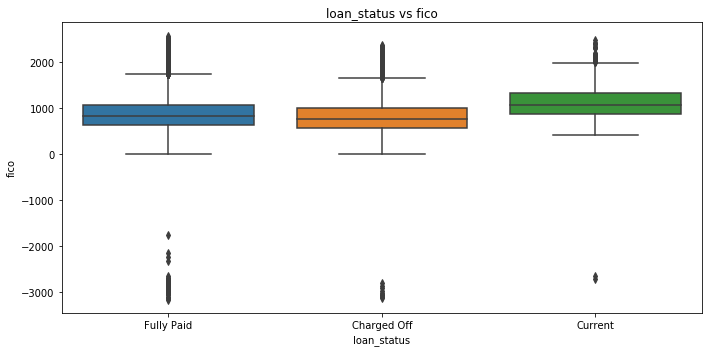

In [115]:
#Checking the FICO spread
plt.figure(figsize=(10,5))       
sns.boxplot(x='loan_status', y='fico', data=loan)
plt.title("loan_status vs fico")
plt.xlabel("loan_status")
plt.ylabel("fico")            
plt.tight_layout()    
plt.show()


Skewness: -0.551152
Kurtosis: 12.575166


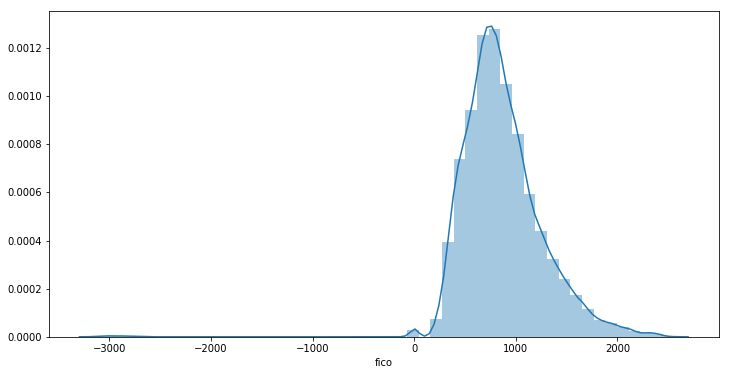

In [116]:
#Checking the FICO spread
plt.figure(figsize=(12, 6))
plt.figure(1)
sns.distplot(loan['fico']);
print("Skewness: %f" % loan['fico'].skew())
print("Kurtosis: %f" % loan['fico'].kurt())

plt.show()

#### There are some outliers in FICO as it has some negative values.

In [117]:
## Fraction of negative values
len(loan[loan['fico']<0])/len(loan['fico'])

0.0015831408476291817

In [118]:
# As value of the fico can not be negative.We will set it as 0
loan['fico']=loan['fico'].apply(lambda x: 0 if x <0 else x )

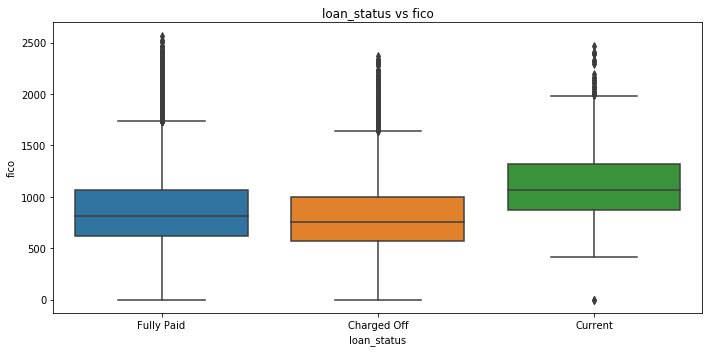

In [119]:
# FICO spread
plt.figure(figsize=(10,5))       
sns.boxplot(x='loan_status', y='fico', data=loan)
plt.title("loan_status vs fico")
plt.xlabel("loan_status")
plt.ylabel("fico")            
plt.tight_layout()    
plt.show()


Skewness: 0.890132
Kurtosis: 1.126546


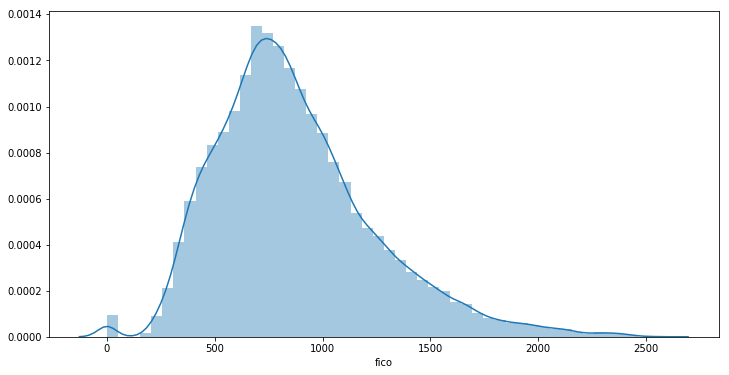

In [120]:
# FICO spread
plt.figure(figsize=(12, 6))
plt.figure(1)
sns.distplot(loan['fico']);
print("Skewness: %f" % loan['fico'].skew())
print("Kurtosis: %f" % loan['fico'].kurt())

plt.show()

### Removing Unwanted Columns
There are many columns which will not impact the analysis.Hence we can remove them.

In [121]:
# We can remove many other columns which are not required based on data
col_to_remove=['id','member_id', 'installment', 'url', 'zip_code', 'addr_state', 'earliest_cr_line', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']
loan=loan.drop(col_to_remove,axis=1)

In [122]:
#Column count
len(loan.columns)

37

In [123]:
#Viewing the data
loan.head(100)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_credit_pull_d,pub_rec_bankruptcies,emp_length_val,term_val,payment_hist,indebtedness,credit_used,credit_history,fico
0,5000,5000,4975.00000,36 months,10.65,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65,0,1,0.0,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,May-16,0.0,10,36,0.0,0.000000,10,10957.0,1644.850000
1,2500,2500,2500.00000,60 months,15.27,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00,0,5,0.0,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,Sep-13,0.0,1,60,0.0,0.000000,7,5114.0,768.100000
2,2400,2400,2400.00000,36 months,15.96,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,2,0.0,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,May-16,0.0,10,36,0.0,0.000000,6,4595.0,690.050000
3,10000,10000,10000.00000,36 months,13.49,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00,0,1,35.0,10,0,5598,21.00,37,0.00,0.00,12231.890000,12231.89,10000.00,Apr-16,0.0,10,36,35.0,0.000000,10,6909.0,1026.100000
4,3000,3000,3000.00000,60 months,12.69,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,17.94,0,0,38.0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,May-16,0.0,1,60,38.0,0.174687,7,7426.0,1102.852406
5,5000,5000,5000.00000,36 months,7.90,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,3,0.0,9,0,7963,28.30,12,0.00,0.00,5632.210000,5632.21,5000.00,Jan-16,0.0,3,36,0.0,0.000000,9,3713.0,558.750000
6,7000,7000,7000.00000,60 months,15.96,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,0,1,0.0,7,0,17726,85.60,11,0.00,0.00,10110.840000,10110.84,6985.61,May-16,0.0,8,60,0.0,0.000000,6,3957.0,594.850000
7,3000,3000,3000.00000,36 months,18.64,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,5.35,0,2,0.0,4,0,8221,87.50,4,0.00,0.00,3939.135294,3939.14,3000.00,Dec-14,0.0,9,36,0.0,0.000000,8,2922.0,439.500000
8,5600,5600,5600.00000,60 months,21.28,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,5.55,0,2,0.0,11,0,5210,32.60,13,0.00,0.00,646.020000,646.02,162.02,Aug-12,0.0,4,60,0.0,0.000000,6,2922.0,440.000000
9,5375,5375,5350.00000,60 months,12.69,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,18.08,0,0,0.0,2,0,9279,36.50,3,0.00,0.00,1476.190000,1469.34,673.48,Mar-13,0.0,1,60,0.0,0.000000,7,2983.0,448.350000


In [124]:
#Cheking the correlation 
loan.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies,emp_length_val,term_val,payment_hist,indebtedness,credit_used,credit_history,fico
loan_amnt,1.000000,0.981332,0.939125,0.309400,0.268193,0.065085,-0.033273,0.009085,-0.047388,0.172488,-0.047590,0.316494,0.065639,0.254664,0.192540,0.192220,0.887426,0.854413,0.852841,-0.032037,0.153806,0.359965,-0.048130,0.134733,-0.252128,0.204804,0.226394
funded_amnt,0.981332,1.000000,0.957777,0.312610,0.263880,0.065050,-0.033975,0.009200,-0.045988,0.170934,-0.048510,0.309603,0.069705,0.248693,0.194602,0.194331,0.904332,0.871320,0.871520,-0.033379,0.153368,0.339146,-0.046746,0.134930,-0.247347,0.197921,0.220154
funded_amnt_inv,0.939125,0.957777,1.000000,0.307194,0.251416,0.073685,-0.040114,-0.005686,-0.047005,0.158319,-0.050172,0.289756,0.075212,0.241155,0.203253,0.203260,0.881318,0.914126,0.845899,-0.034484,0.164455,0.360073,-0.047903,0.144946,-0.231537,0.202007,0.229830
int_rate,0.309400,0.312610,0.307194,1.000000,0.051109,0.113595,0.157881,0.132106,0.165528,0.014014,0.097249,0.099699,0.466404,-0.040556,0.135342,0.135398,0.309989,0.305480,0.187802,0.083002,0.006394,0.453391,0.169066,0.143290,-0.722151,-0.077347,-0.084654
annual_inc,0.268193,0.263880,0.251416,0.051109,1.000000,-0.124945,0.022383,0.034589,0.017374,0.155291,-0.015215,0.278998,0.015987,0.234254,0.033259,0.033162,0.254579,0.243878,0.256121,-0.012652,0.111321,0.046207,0.017877,0.017897,-0.043259,0.173337,0.189517
dti,0.065085,0.065050,0.073685,0.113595,-0.124945,1.000000,-0.035582,-0.000605,-0.016617,0.289307,-0.005061,0.228140,0.278416,0.230107,0.035756,0.035670,0.063788,0.070886,0.040207,0.007073,0.050904,0.084000,-0.017421,0.036584,-0.091892,0.059604,0.066407
delinq_2yrs,-0.033273,-0.033975,-0.040114,0.157881,0.022383,-0.035582,1.000000,0.007264,0.004173,0.011048,0.009643,-0.055436,-0.043389,0.067052,-0.003106,-0.003306,-0.023844,-0.030164,-0.039944,0.004681,0.015407,0.006331,0.026953,-0.001220,-0.119157,0.063256,0.064747
inq_last_6mths,0.009085,0.009200,-0.005686,0.132106,0.034589,-0.000605,0.007264,1.000000,0.013004,0.092662,0.024699,-0.022644,-0.069103,0.112372,-0.010740,-0.010400,-0.009645,-0.019469,-0.022414,0.014537,0.008791,0.041387,0.013164,-0.009314,-0.111258,-0.003223,-0.008277
mths_since_last_delinq,-0.047388,-0.045988,-0.047005,0.165528,0.017374,-0.016617,0.004173,0.013004,1.000000,0.035460,0.059768,-0.066765,0.035601,0.085321,-0.012177,-0.012128,-0.032664,-0.034205,-0.047879,0.024044,0.039062,0.003595,0.999740,-0.006113,-0.126523,0.074134,0.061216
open_acc,0.172488,0.170934,0.158319,0.014014,0.155291,0.289307,0.011048,0.092662,0.035460,1.000000,0.003200,0.286858,-0.087692,0.685413,0.028439,0.028262,0.157940,0.148185,0.155443,0.009439,0.096920,0.049887,0.035699,0.024701,-0.022048,0.206539,0.224979


In [125]:
# Getting columns names
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'emp_length_val',
       'term_val', 'payment_hist', 'indebtedness', 'credit_used',
       'credit_history', 'fico'],
      dtype='object')

In [126]:
# Column count
len(loan.columns)

37

In [127]:
# Taking the columns which have similar data to check the correlation
loan_comm=['funded_amnt','funded_amnt_inv','loan_amnt','total_pymnt'\
           ,'total_pymnt_inv','total_rec_prncp','inq_last_6mths','issue_d'\
           ,'last_credit_pull_d','open_acc','out_prncp','out_prncp_inv'\
           ,'pub_rec','pub_rec_bankruptcies','revol_bal','revol_util','sub_grade','total_acc'\
          ,'payment_hist','indebtedness','credit_used','credit_history','fico']

In [128]:
# Column count
len(loan_comm)

23

In [129]:
# Verifying the list
print(loan_comm)

['funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'inq_last_6mths', 'issue_d', 'last_credit_pull_d', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'sub_grade', 'total_acc', 'payment_hist', 'indebtedness', 'credit_used', 'credit_history', 'fico']


In [130]:
# FIletring the data
loan_data=loan[loan_comm]

In [131]:
# Viewing the data
loan_data.head()

,funded_amnt,funded_amnt_inv,loan_amnt,total_pymnt,total_pymnt_inv,total_rec_prncp,inq_last_6mths,issue_d,last_credit_pull_d,open_acc,out_prncp,out_prncp_inv,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,total_acc,payment_hist,indebtedness,credit_used,credit_history,fico
0,5000,4975.0,5000,5863.155187,5833.84,5000.00,1,Dec-11,May-16,3,0.00,0.00,0,0.0,13648,83.7,B2,9,0.0,0.000000,10,10957.0,1644.850000
1,2500,2500.0,2500,1008.710000,1008.71,456.46,5,Dec-11,Sep-13,3,0.00,0.00,0,0.0,1687,9.4,C4,4,0.0,0.000000,7,5114.0,768.100000
2,2400,2400.0,2400,3005.666844,3005.67,2400.00,2,Dec-11,May-16,2,0.00,0.00,0,0.0,2956,98.5,C5,10,0.0,0.000000,6,4595.0,690.050000
3,10000,10000.0,10000,12231.890000,12231.89,10000.00,1,Dec-11,Apr-16,10,0.00,0.00,0,0.0,5598,21.0,C1,37,35.0,0.000000,10,6909.0,1026.100000
4,3000,3000.0,3000,3513.330000,3513.33,2475.94,0,Dec-11,May-16,15,524.06,524.06,0,0.0,27783,53.9,B5,38,38.0,0.174687,7,7426.0,1102.852406


In [132]:
# Finding the correlation 
loan_corr=loan_data.corr()

In [133]:
# View Correlation
loan_corr

,funded_amnt,funded_amnt_inv,loan_amnt,total_pymnt,total_pymnt_inv,total_rec_prncp,inq_last_6mths,open_acc,out_prncp,out_prncp_inv,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,payment_hist,indebtedness,credit_used,credit_history,fico
funded_amnt,1.000000,0.957777,0.981332,0.904332,0.871320,0.871520,0.009200,0.170934,0.194602,0.194331,-0.048510,-0.033379,0.309603,0.069705,0.248693,-0.046746,0.134930,-0.247347,0.197921,0.220154
funded_amnt_inv,0.957777,1.000000,0.939125,0.881318,0.914126,0.845899,-0.005686,0.158319,0.203253,0.203260,-0.050172,-0.034484,0.289756,0.075212,0.241155,-0.047903,0.144946,-0.231537,0.202007,0.229830
loan_amnt,0.981332,0.939125,1.000000,0.887426,0.854413,0.852841,0.009085,0.172488,0.192540,0.192220,-0.047590,-0.032037,0.316494,0.065639,0.254664,-0.048130,0.134733,-0.252128,0.204804,0.226394
total_pymnt,0.904332,0.881318,0.887426,1.000000,0.970160,0.971221,-0.009645,0.157940,0.238910,0.238588,-0.050390,-0.038708,0.292367,0.079568,0.222754,-0.033196,0.179398,-0.243084,0.218675,0.242111
total_pymnt_inv,0.871320,0.914126,0.854413,0.970160,1.000000,0.938603,-0.019469,0.148185,0.246040,0.246029,-0.051264,-0.039444,0.276613,0.083461,0.217006,-0.034880,0.187723,-0.229806,0.220337,0.247847
total_rec_prncp,0.871520,0.845899,0.852841,0.971221,0.938603,1.000000,-0.022414,0.155443,0.165551,0.165262,-0.062102,-0.049177,0.280556,0.024831,0.228540,-0.048772,0.112875,-0.152328,0.208266,0.230067
inq_last_6mths,0.009200,-0.005686,0.009085,-0.009645,-0.019469,-0.022414,1.000000,0.092662,-0.010740,-0.010400,0.024699,0.014537,-0.022644,-0.069103,0.112372,0.013164,-0.009314,-0.111258,-0.003223,-0.008277
open_acc,0.170934,0.158319,0.172488,0.157940,0.148185,0.155443,0.092662,1.000000,0.028439,0.028262,0.003200,0.009439,0.286858,-0.087692,0.685413,0.035699,0.024701,-0.022048,0.206539,0.224979
out_prncp,0.194602,0.203253,0.192540,0.238910,0.246040,0.165551,-0.010740,0.028439,1.000000,0.999824,-0.013530,-0.010613,0.060803,0.039484,0.031350,-0.012243,0.901850,-0.075697,0.095846,0.103349
out_prncp_inv,0.194331,0.203260,0.192220,0.238588,0.246029,0.165262,-0.010400,0.028262,0.999824,1.000000,-0.013781,-0.010925,0.060599,0.039652,0.031165,-0.012199,0.901695,-0.075729,0.095550,0.103038


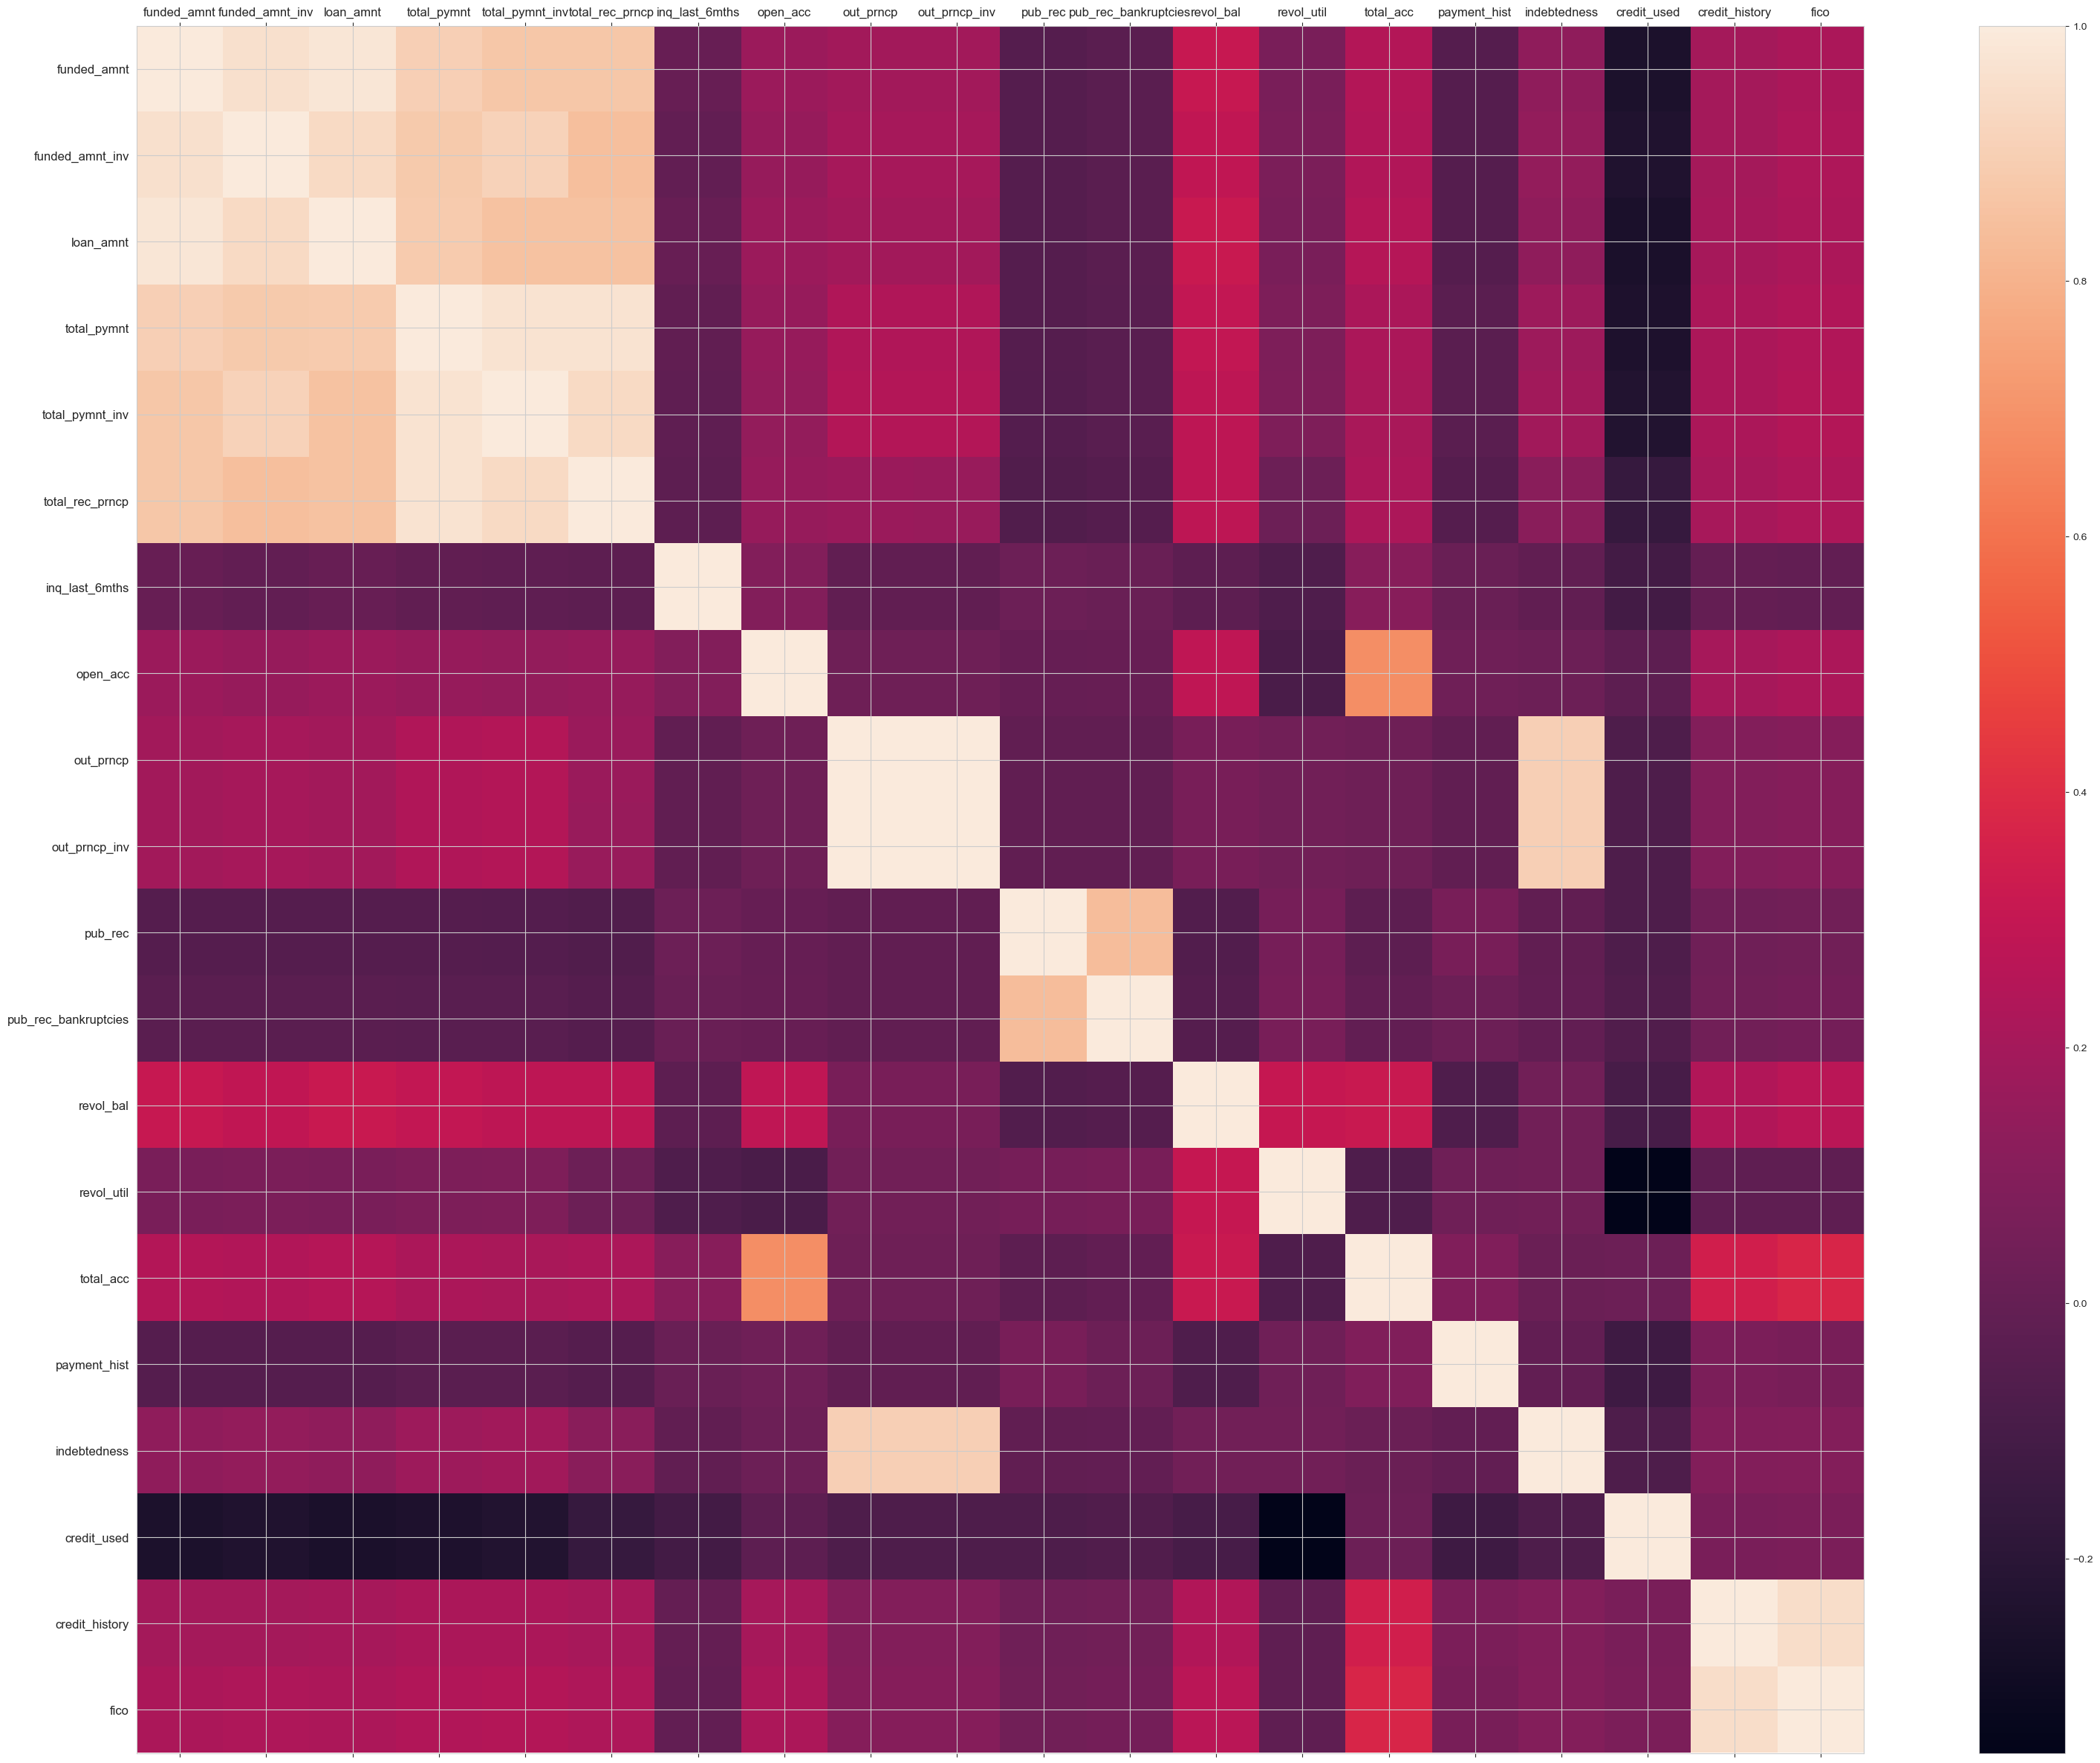

In [134]:
#Heatmap for correlation
sns.set_style("whitegrid")
plt.figure(num=None, figsize=(40,30),dpi=100,facecolor='w', edgecolor='k')
plt.matshow(loan_corr, fignum=1)
plt.xticks(range(len(loan_corr.columns)), loan_corr.columns);
plt.yticks(range(len(loan_corr.columns)), loan_corr.columns);
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=10)
plt.show()

#### Analysis Result of the heapmap

## Bivariate columns 
##### Columns which have high correlation
1. 'funded_amnt','funded_amnt_inv','loan_amnt','total_pymnt','total_pymnt_inv','total_rec_prncp'
2. 'out_prncp','out_prncp_inv'
3. 'pub_rec','pub_rec_bankruptcies'
4. 'open_acc','total_acc'

##### Columns which are invesly propostional
1. 'credit_used' and 'revol_util'

In [135]:
## Need to chooose one column from each
columns_choosen=['total_pymnt_inv','out_prncp_inv','pub_rec_bankruptcies','open_acc','fico','credit_used','payment_hist','revol_bal','revol_util']
cols_to_remove=[col for col in loan.columns if (col not in columns_choosen)& (col in loan_comm) ]
print(cols_to_remove)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'issue_d', 'inq_last_6mths', 'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'last_credit_pull_d', 'indebtedness', 'credit_history']


In [136]:
# Columns tp remove
len(cols_to_remove)

14

In [137]:
#drop the null columns
loan = loan.drop(cols_to_remove, axis=1)

In [138]:
# Viewing teh interested data
loan.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,revol_util,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,emp_length_val,term_val,payment_hist,credit_used,fico
0,36 months,10.65,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,0.0,3,13648,83.7,0.00,5833.84,0.0,10,36,0.0,10,1644.850000
1,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,0.0,3,1687,9.4,0.00,1008.71,0.0,1,60,0.0,7,768.100000
2,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,0.0,2,2956,98.5,0.00,3005.67,0.0,10,36,0.0,6,690.050000
3,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,35.0,10,5598,21.0,0.00,12231.89,0.0,10,36,35.0,10,1026.100000
4,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0,38.0,15,27783,53.9,524.06,3513.33,0.0,1,60,38.0,7,1102.852406


### Data Driven 
1. loan_status_val- converting the status to numerical value
2. loan_status_default - setting a 1 for charged off else 0

In [139]:
#converting the status to numerical value
loan['loan_status_val']=loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else( 0 if x== 'Fully Paid' else 2 ))

In [140]:
# setting a 1 for charged off else 0
loan['loan_status_default']=loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

### Creating graphs to analyse the data

In [141]:
#Getting  numerical columns
numerical_feats = loan.dtypes[loan.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_feats))
print(numerical_feats)

# of Numerical features:  18
Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'out_prncp_inv', 'total_pymnt_inv', 'pub_rec_bankruptcies',
       'emp_length_val', 'term_val', 'payment_hist', 'credit_used', 'fico',
       'loan_status_val', 'loan_status_default'],
      dtype='object')


Skewness: 0.890132
Kurtosis: 1.126546


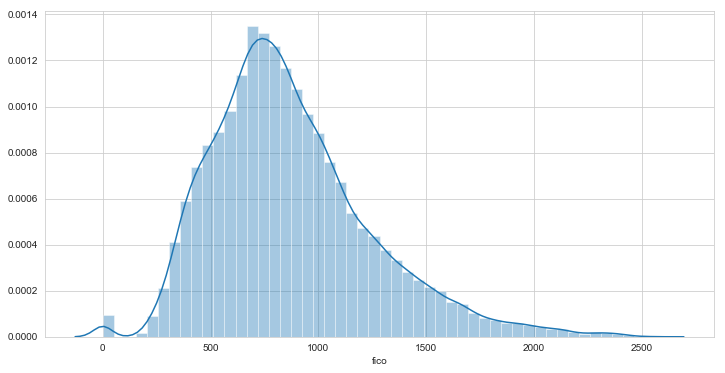

In [142]:
# Checking the FICO spread
plt.figure(figsize=(12, 6))
plt.figure(1)
sns.distplot(loan['fico']);
print("Skewness: %f" % loan['fico'].skew())
print("Kurtosis: %f" % loan['fico'].kurt())

plt.show()

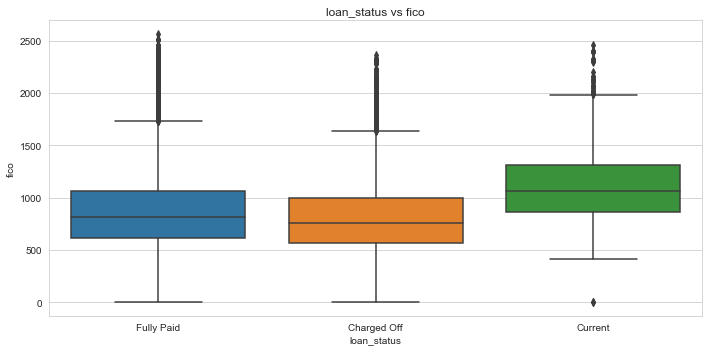

In [143]:
# comparing across loan_status vs fico based on median
plt.figure(figsize=(10,5))       
sns.boxplot(x='loan_status', y='fico', data=loan)
plt.title("loan_status vs fico")
plt.xlabel("loan_status")
plt.ylabel("fico")            
plt.tight_layout()    
plt.show()


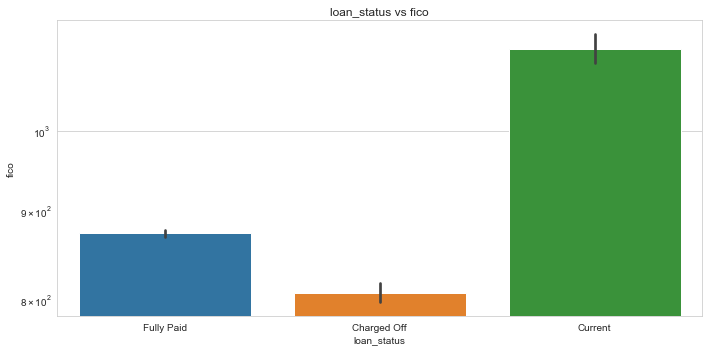

In [144]:
# comparing across loan_status based on median for fico
plt.figure(figsize=(10,5))       
sns.barplot(x='loan_status', y='fico', data=loan,estimator=np.mean)
plt.title("loan_status vs fico")
plt.xlabel("loan_status")
plt.ylabel("fico")    
plt.yscale('log')
plt.tight_layout()    
plt.show()


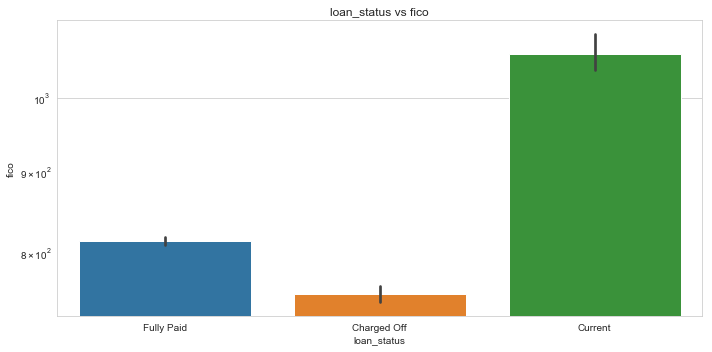

In [145]:
# comparing across loan_status based on median for FICO
plt.figure(figsize=(10,5))       
sns.barplot(x='loan_status', y='fico', data=loan,estimator=np.median)
plt.title("loan_status vs fico")
plt.xlabel("loan_status")
plt.ylabel("fico")   
plt.yscale('log')
plt.tight_layout()    
plt.show()


### Analysis- Higher the fico lower is the chance of charged off

### Spread of data for each variable

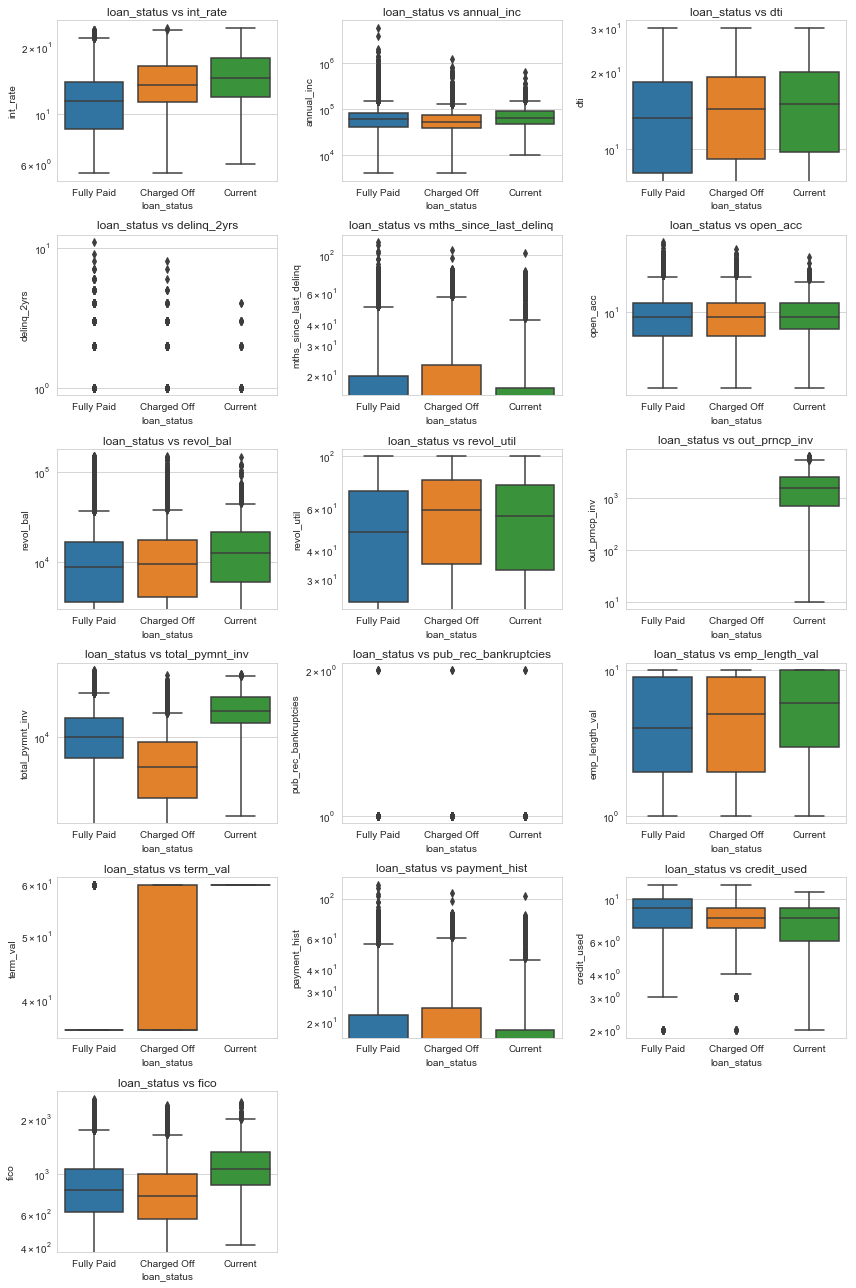

In [146]:
# comparing summary stats across loan_status on log scale
nr_rows = 6
nr_cols = 3

plt.figure(figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['loan_status_val','loan_status_default']
li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            plt.subplot(nr_rows, nr_cols, i+1)
            sns.boxplot(x='loan_status', y=li_plot_num_feats[i], data=loan)  
            plt.title("loan_status vs " + li_plot_num_feats[i])
            plt.xlabel("loan_status")
            plt.ylabel(li_plot_num_feats[i])            
            plt.yscale('log')
plt.tight_layout()    
plt.show()

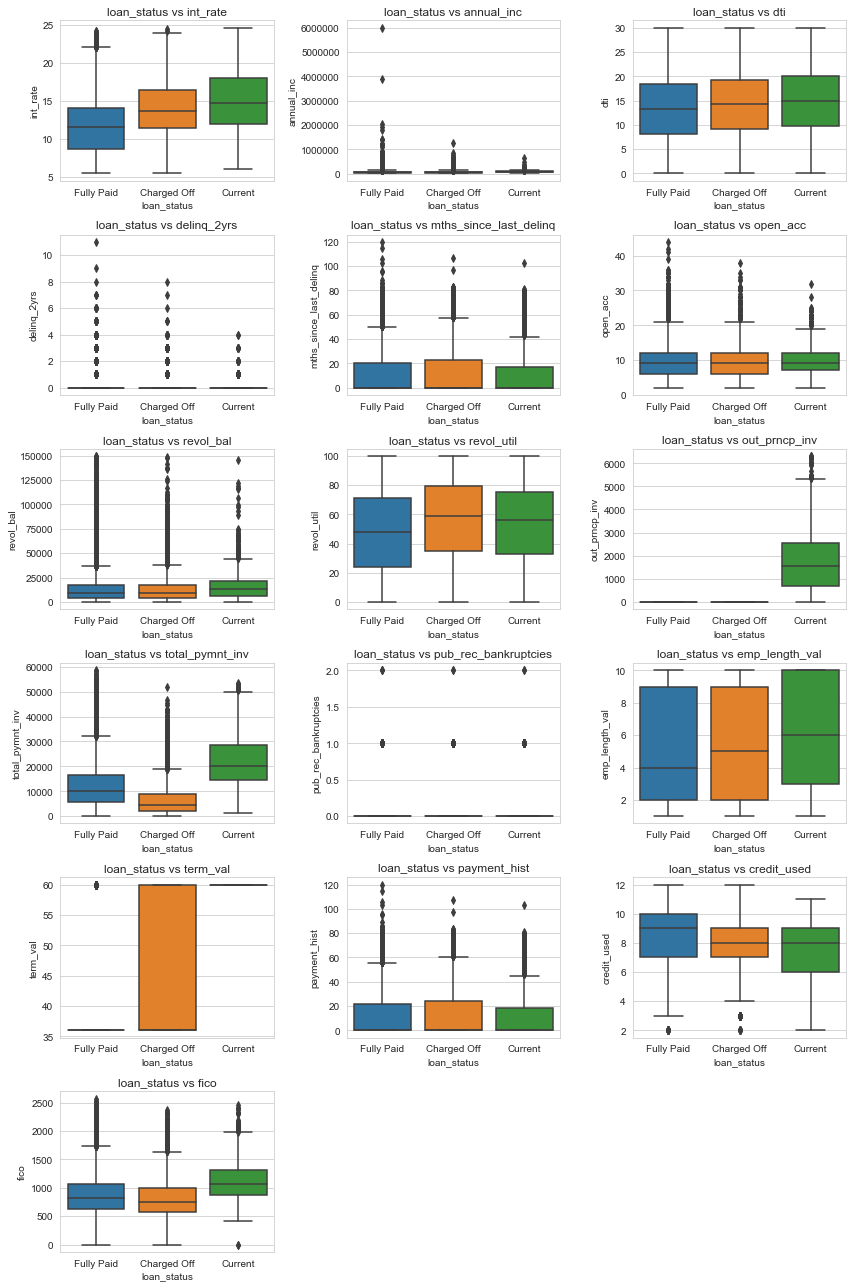

In [147]:
# comparing summary stats across  loan_status
nr_rows = 6
nr_cols = 3

plt.figure(figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):        
            plt.subplot(nr_rows, nr_cols, i+1)
            sns.boxplot(x='loan_status', y=li_plot_num_feats[i], data=loan)  
            plt.title("loan_status vs " + li_plot_num_feats[i])
            plt.xlabel("loan_status")
            plt.ylabel(li_plot_num_feats[i])            
plt.tight_layout()    
plt.show()

### Comparing data for each variable

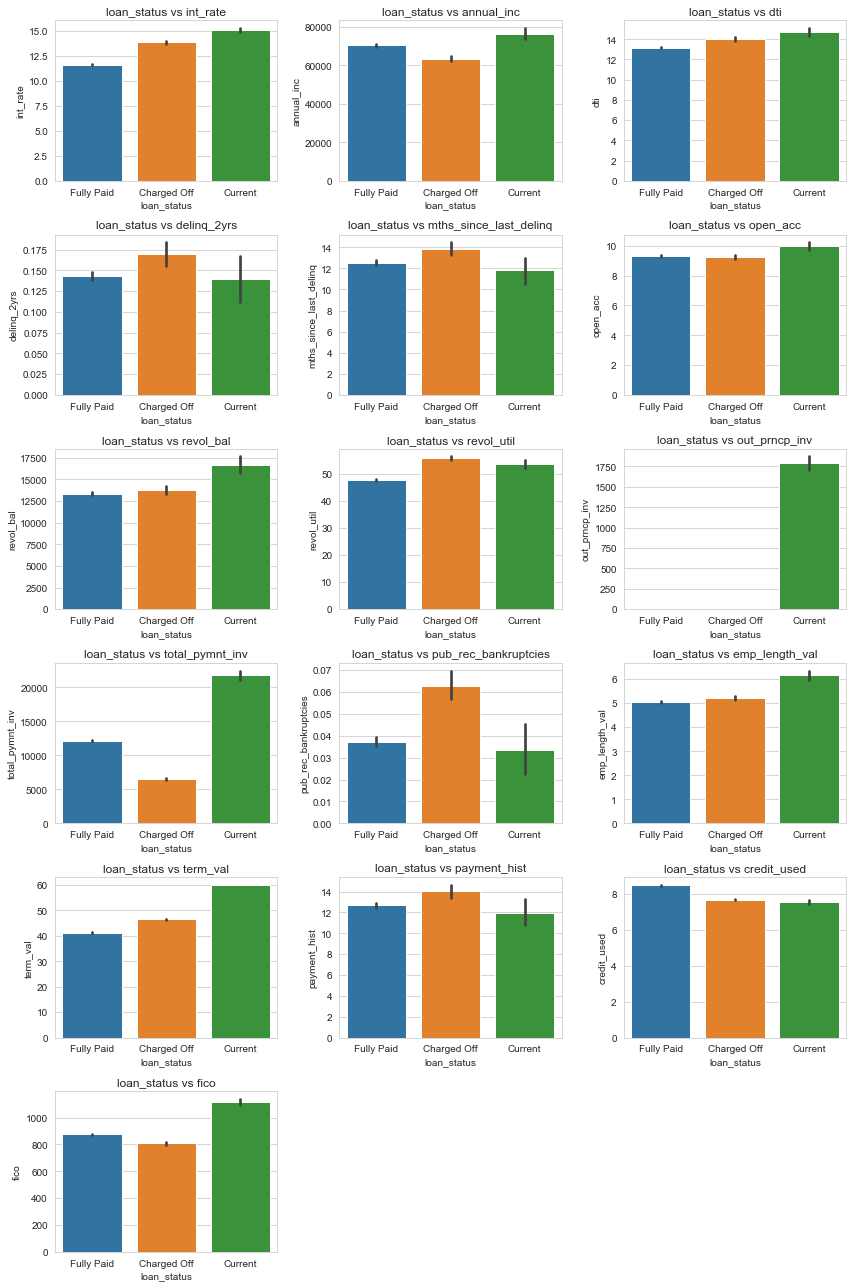

In [148]:
# comparing summary stats across loan_status based on mean
nr_rows = 6
nr_cols = 3

plt.figure(figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['loan_status_default','loan_status_val']
li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            plt.subplot(nr_rows, nr_cols, i+1)            
            sns.barplot(x='loan_status', y=li_plot_num_feats[i], data=loan,estimator=np.mean)
            plt.title("loan_status vs " + li_plot_num_feats[i])
            plt.xlabel("loan_status")
            plt.ylabel(li_plot_num_feats[i])            
plt.tight_layout()    
plt.show()


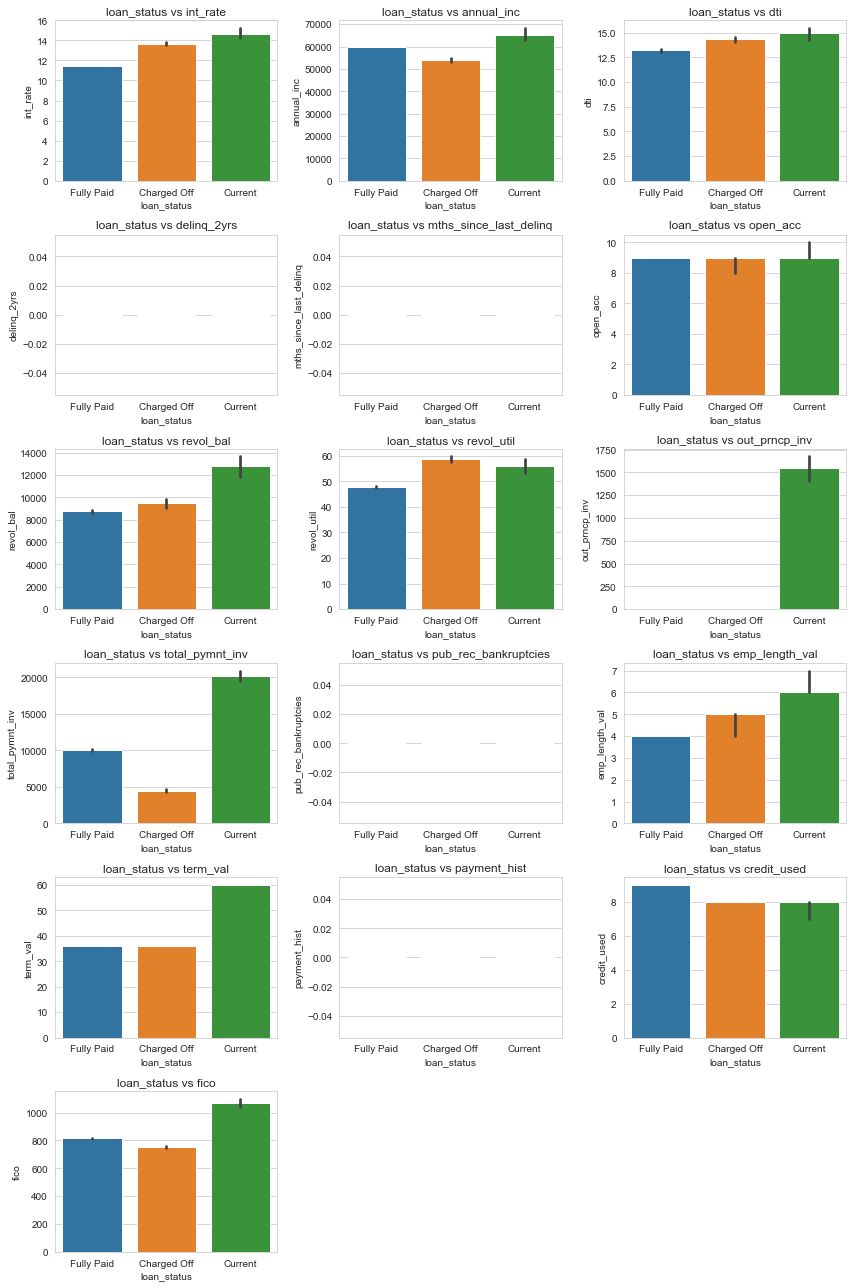

In [149]:
# comparing summary stats across loan_status based on median
nr_rows = 6
nr_cols = 3

plt.figure(figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['loan_status_default','loan_status_val']
li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)            
            sns.barplot(x='loan_status', y=li_plot_num_feats[i], data=loan,estimator=np.median)
            plt.title("loan_status vs " + li_plot_num_feats[i])
            plt.xlabel("loan_status")
            plt.ylabel(li_plot_num_feats[i])            
plt.tight_layout()    
plt.show()


### Pearson correlation coefficient for numerical values

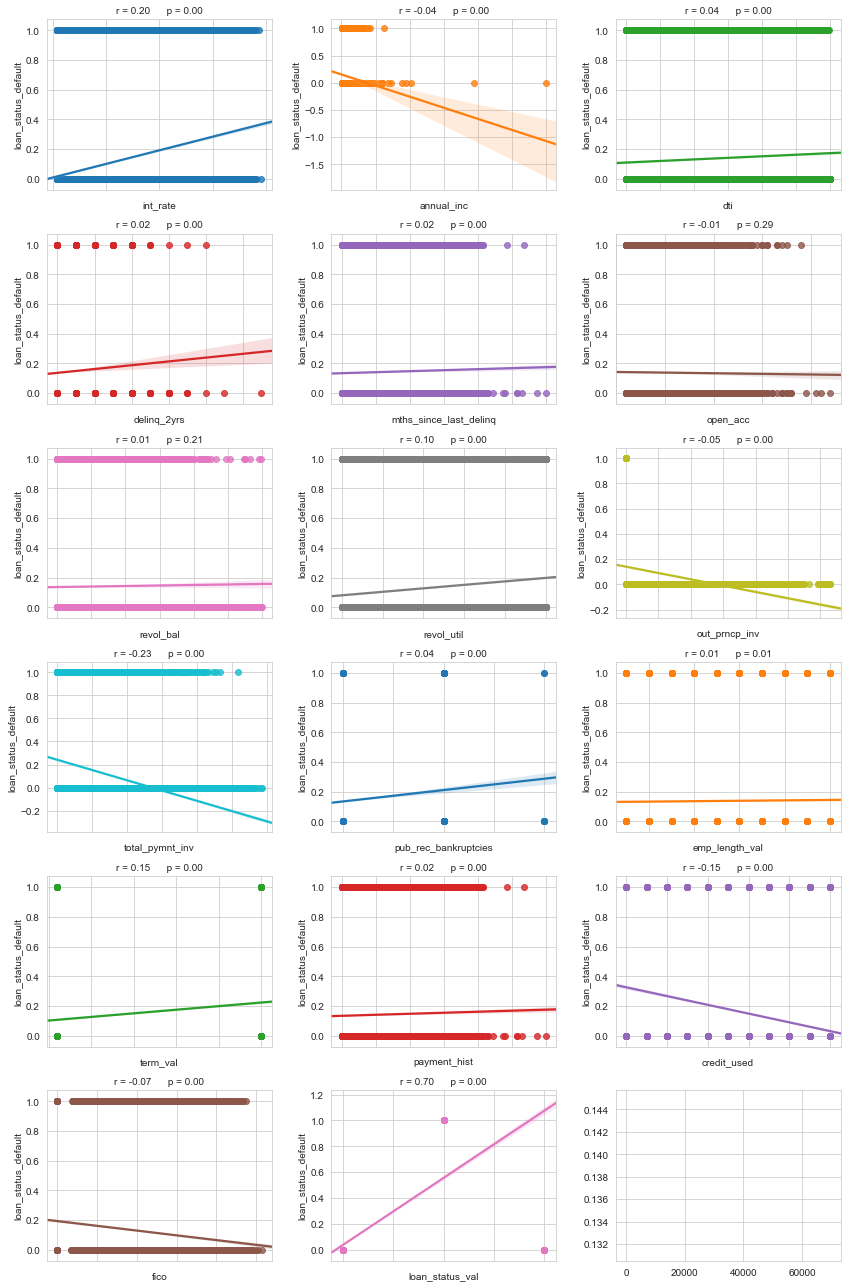

In [150]:
nr_rows = 6
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['loan_status_default']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            p=sns.regplot(loan[li_plot_num_feats[i]], loan['loan_status_default'], ax = axs[r][c])
            stp = stats.pearsonr(loan[li_plot_num_feats[i]], loan['loan_status_default'])            
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=10)
            p.set_xticklabels(p.get_xticklabels(),rotation=30)
            
plt.tight_layout()    
plt.show()   

### Interested columns after the graphs which have relation with being defualt
### Univariate Variables-
#### Quantitative Variable 

Relation with loan being default
1. int_rate- direct
2. annual_inc-inverse
3. mths_since_last_delinq - direct
4. pub_rec_bankruptcies- direct
5. delinq_2yrs - direct
6. dti - direct
7. fico - direct
8. credit_history -inverse
9. credit_used -inverse
10. payment_hist - direct
11. revol_util -direct


In [151]:
# Taking the important Quantitative Variable  columns
li_num_col=['int_rate','annual_inc','mths_since_last_delinq','pub_rec_bankruptcies','delinq_2yrs','dti','fico','credit_used','payment_hist','revol_util']

In [152]:
# Column count
len(li_num_col)

10

In [153]:
#Categorical Columns
categorical_feats = loan.dtypes[loan.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_feats))
print(categorical_feats)

# of Categorical features:  7
Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose'],
      dtype='object')


### Univariate Variables
1. Unordered categorical Variables: 'purpose', 'home_ownership'
2. Ordered categorical Variables: 'verification_status',grade,loan_status

#### Type-driven metrics
1. Nominal variables: 
	purpose,home_ownership
2. Ordinal variables:
      grades,verification_status,loan_status
3. Interval variables:
      term,emp_length

### Getting only charged-off data now

In [154]:
# Taking only charged off data to compare the categories
loan_default=loan[loan['loan_status']=='Charged Off']

In [155]:
# Viewing the data
loan_default.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,revol_util,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,emp_length_val,term_val,payment_hist,credit_used,fico,loan_status_val,loan_status_default
1,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,0.0,3,1687,9.4,0.0,1008.71,0.0,1,60,0.0,7,768.10,1,1
8,60 months,21.28,F,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,5.55,0,0.0,11,5210,32.6,0.0,646.02,0.0,4,60,0.0,6,440.00,1,1
9,60 months,12.69,B,< 1 year,RENT,15000.0,Verified,Charged Off,other,18.08,0,0.0,2,9279,36.5,0.0,1469.34,0.0,1,60,0.0,7,448.35,1,1
12,36 months,13.49,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,10.08,0,0.0,4,10452,91.7,0.0,2270.70,0.0,1,36,0.0,10,453.35,1,1
14,36 months,10.65,B,3 years,RENT,100000.0,Source Verified,Charged Off,other,7.06,0,0.0,14,11997,55.5,0.0,7471.99,0.0,3,36,0.0,10,1230.75,1,1


In [156]:
# Checking the frequecny of data for each catagory
# importing display for Tabluar format display
from IPython.display import display

for cat in categorical_feats:
    if cat!='loan_status':
        display(loan_default.groupby(cat,as_index=False)['loan_status'].agg('count').rename(columns={'loan_status':'No.of Charged off Loan',cat:cat.title()}))


,Term,No.of Charged off Loan
0,36 months,3013
1,60 months,2308


,Grade,No.of Charged off Loan
0,A,552
1,B,1342
2,C,1263
3,D,1069
4,E,689
5,F,310
6,G,96


,Emp_Length,No.of Charged off Loan
0,1 year,444
1,10+ years,1321
2,2 years,560
3,3 years,548
4,4 years,453
5,5 years,447
6,6 years,304
7,7 years,262
8,8 years,199
9,9 years,155


,Home_Ownership,No.of Charged off Loan
0,MORTGAGE,2229
1,OTHER,18
2,OWN,395
3,RENT,2679


,Verification_Status,No.of Charged off Loan
0,Not Verified,2009
1,Source Verified,1380
2,Verified,1932


,Purpose,No.of Charged off Loan
0,car,154
1,credit_card,507
2,debt_consolidation,2647
3,educational,50
4,home_improvement,325
5,house,57
6,major_purchase,205
7,medical,100
8,moving,84
9,other,585


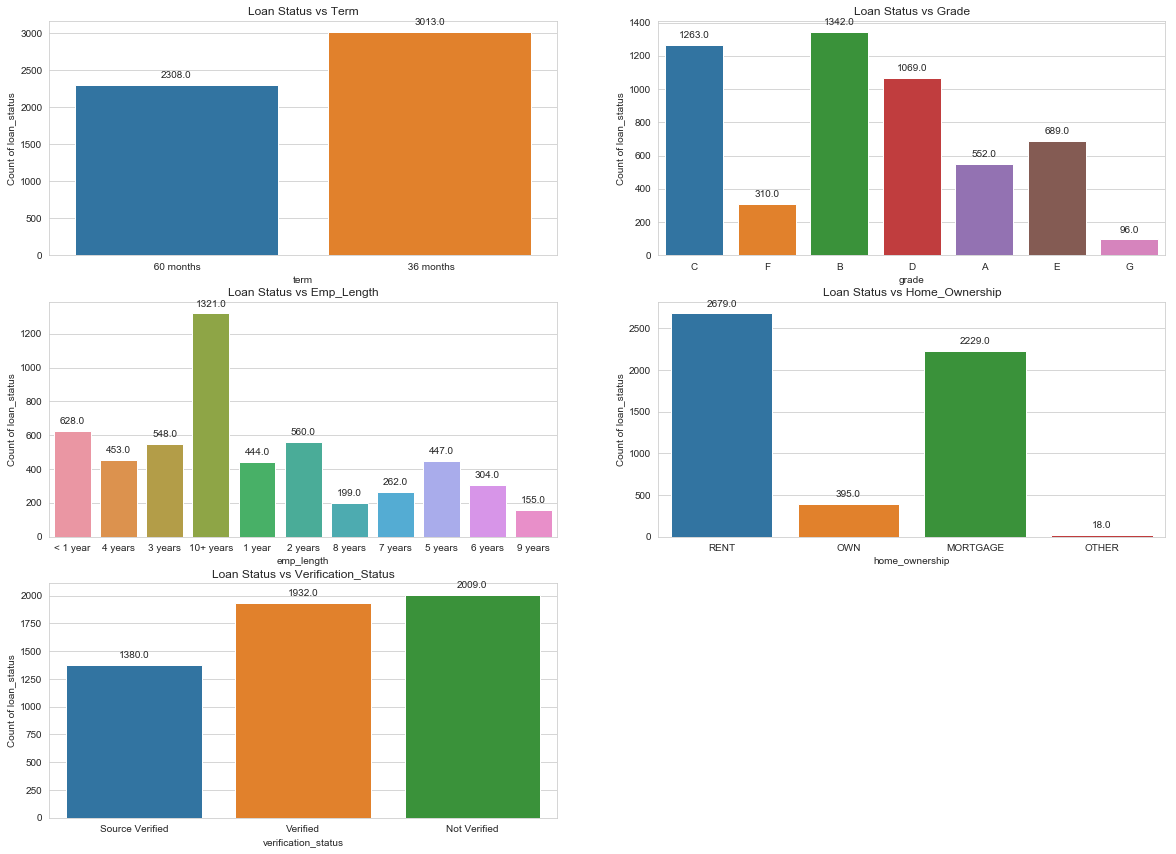

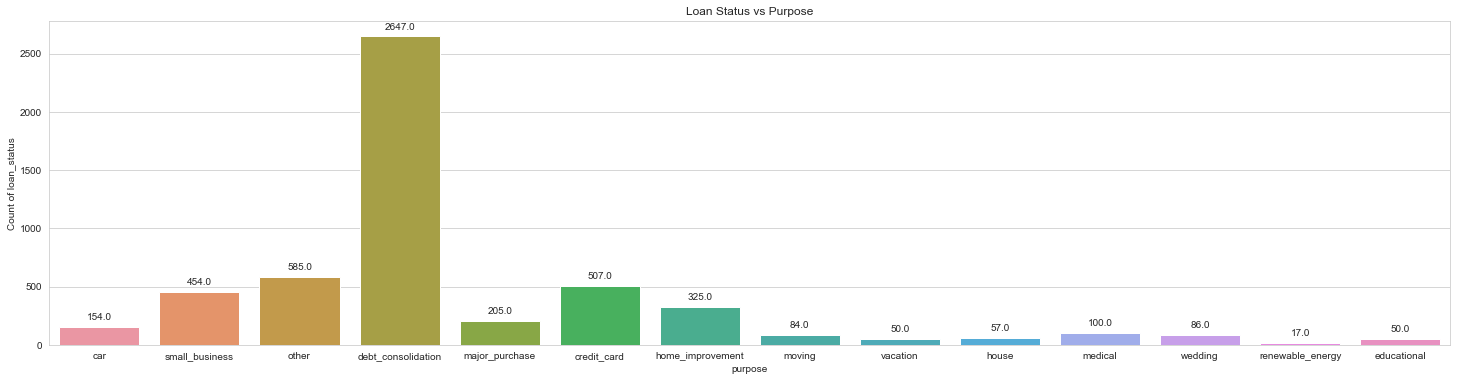

In [157]:
# comparing summary stats loan_status count ,gives the frequency for each
nr_rows = 5
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_cat_feats = list(categorical_feats)
li_not_plot = ['loan_status']
li_plot_cat_feats = [c for c in list(li_cat_feats) if c not in li_not_plot]



for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_cat_feats):
            if(li_plot_cat_feats[i]=='purpose'):
                ax=plt.figure(figsize=(nr_cols*20,nr_rows*5))
            ax=plt.subplot(nr_rows, nr_cols, i+1)            
            sns.barplot(y='loan_status_default', x=li_plot_cat_feats[i],data=loan_default,estimator=np.size)
            plt.title("Loan Status vs " + li_plot_cat_feats[i].title())
            plt.ylabel("Count of loan_status")
            plt.xlabel(li_plot_cat_feats[i])   
            rects = ax.patches
            for rect in rects:
                # Get X and Y placement of label from rect.
                y_value = rect.get_height()
                x_value = rect.get_x() + rect.get_width() / 2
                space = 5                
                va = 'bottom'
                # Use Y value as label and format number with one decimal place
                label = "{:.1f}".format(y_value)

                # Create annotation
                plt.annotate(
                    label,                      # Use `label` as label
                    (x_value, y_value),         # Place label at end of the bar
                    xytext=(0, space),          # Vertically shift label by `space`
                    textcoords="offset points", # Interpret `xytext` as offset in points
                    ha='center',                # Horizontally center label
                    va=va)                      # Vertically align label differently for
                                                # positive and negative values.
plt.tight_layout()    
plt.show()


### Analysis for higher frequecy of charged off
1. Grade B and C 
2. 10+ Years Employee length
3. Rent and Mortarage - Home Ownership
4. Not Verified- Verification status
5. Purpose-Debt Consolidation
6. Term- 36 months

### Relationship of each category with each variable 

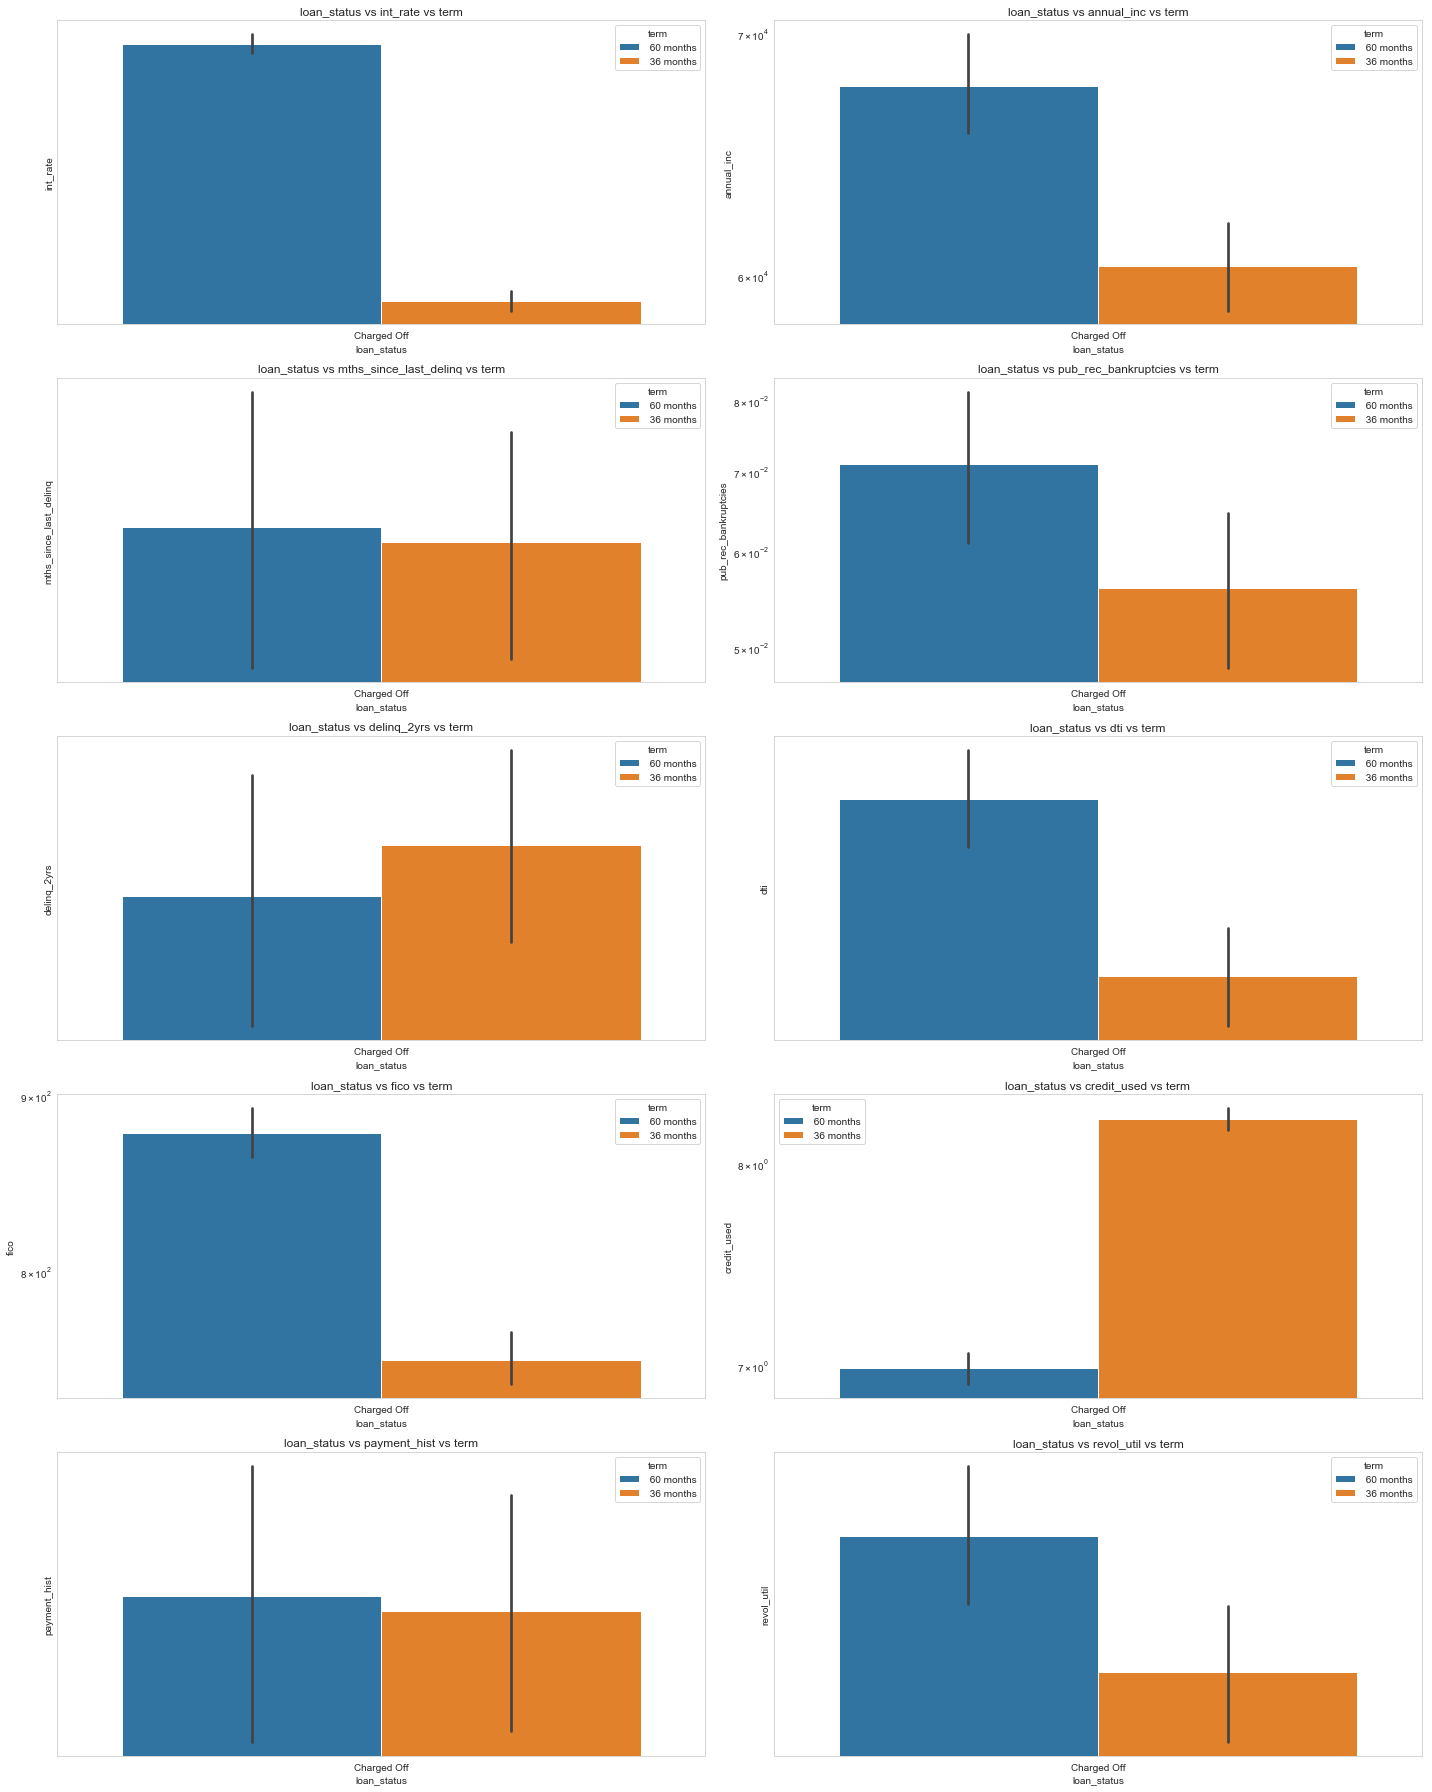

In [158]:
# comparing summary stats across loan_status based on term
nr_rows = 5
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_num_feats = list(li_num_col)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)                        
            sns.barplot(x='loan_status', y=li_num_feats[i],data=loan_default,hue=categorical_feats[0],estimator=np.mean)
            plt.title("loan_status vs " + li_num_feats[i]+" vs "+categorical_feats[0])
            plt.xlabel("loan_status")
            plt.ylabel(li_num_feats[i])            
            plt.yscale('log')
plt.tight_layout()    
plt.show()


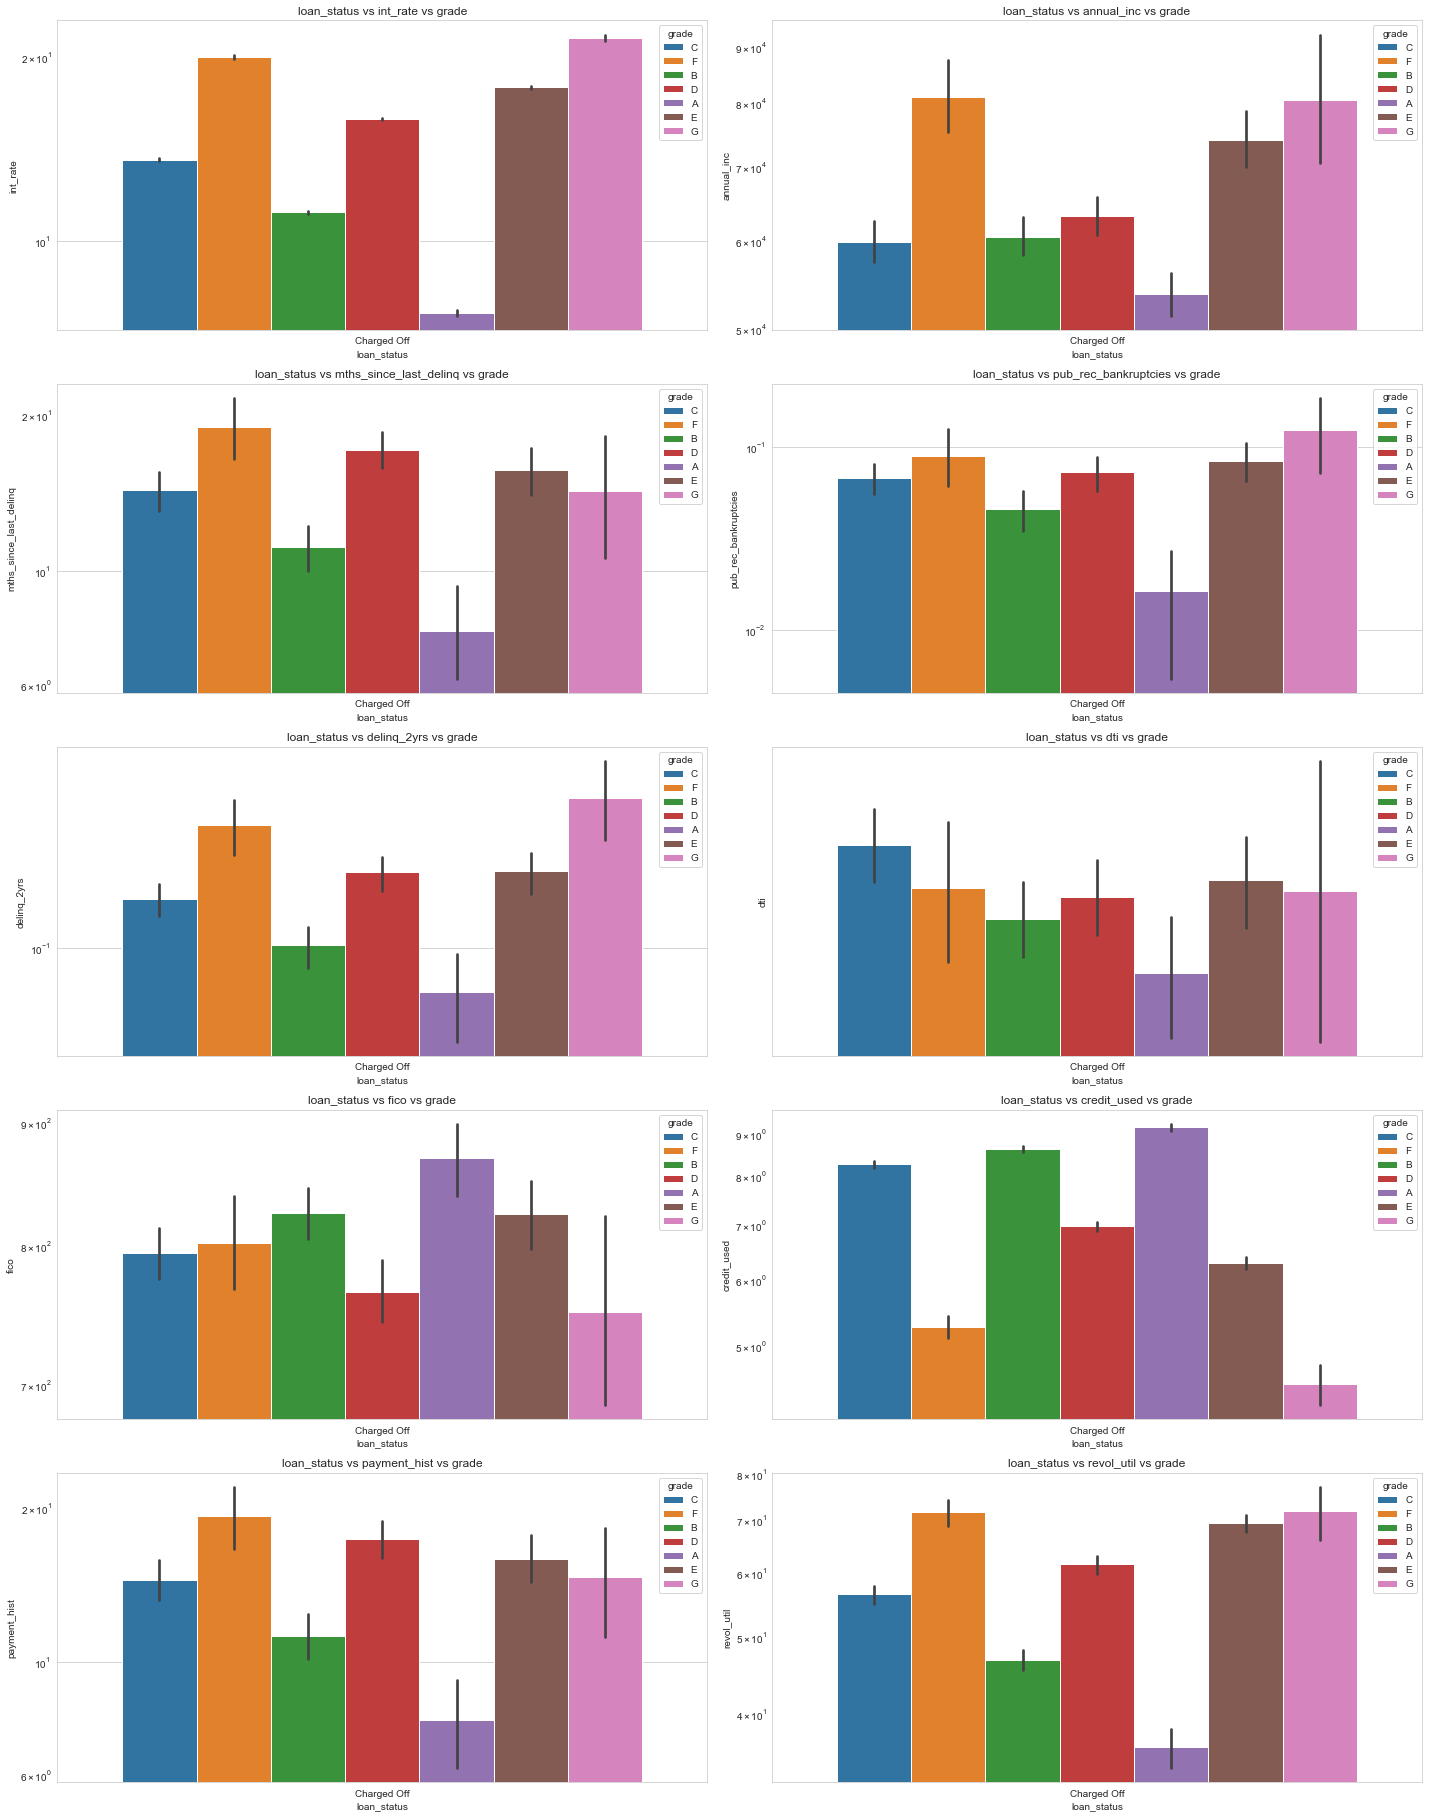

In [159]:
# comparing summary stats across loan_status based on grade for each numerical value
nr_rows = 6
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_num_feats = list(li_num_col)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)                        
            sns.barplot(x='loan_status', y=li_num_feats[i],data=loan_default,hue=categorical_feats[1],estimator=np.mean)
            plt.title("loan_status vs " + li_num_feats[i]+" vs "+categorical_feats[1])
            plt.xlabel('loan_status')
            plt.ylabel(li_num_feats[i]) 
            plt.yscale('log')
plt.tight_layout()    
plt.show()


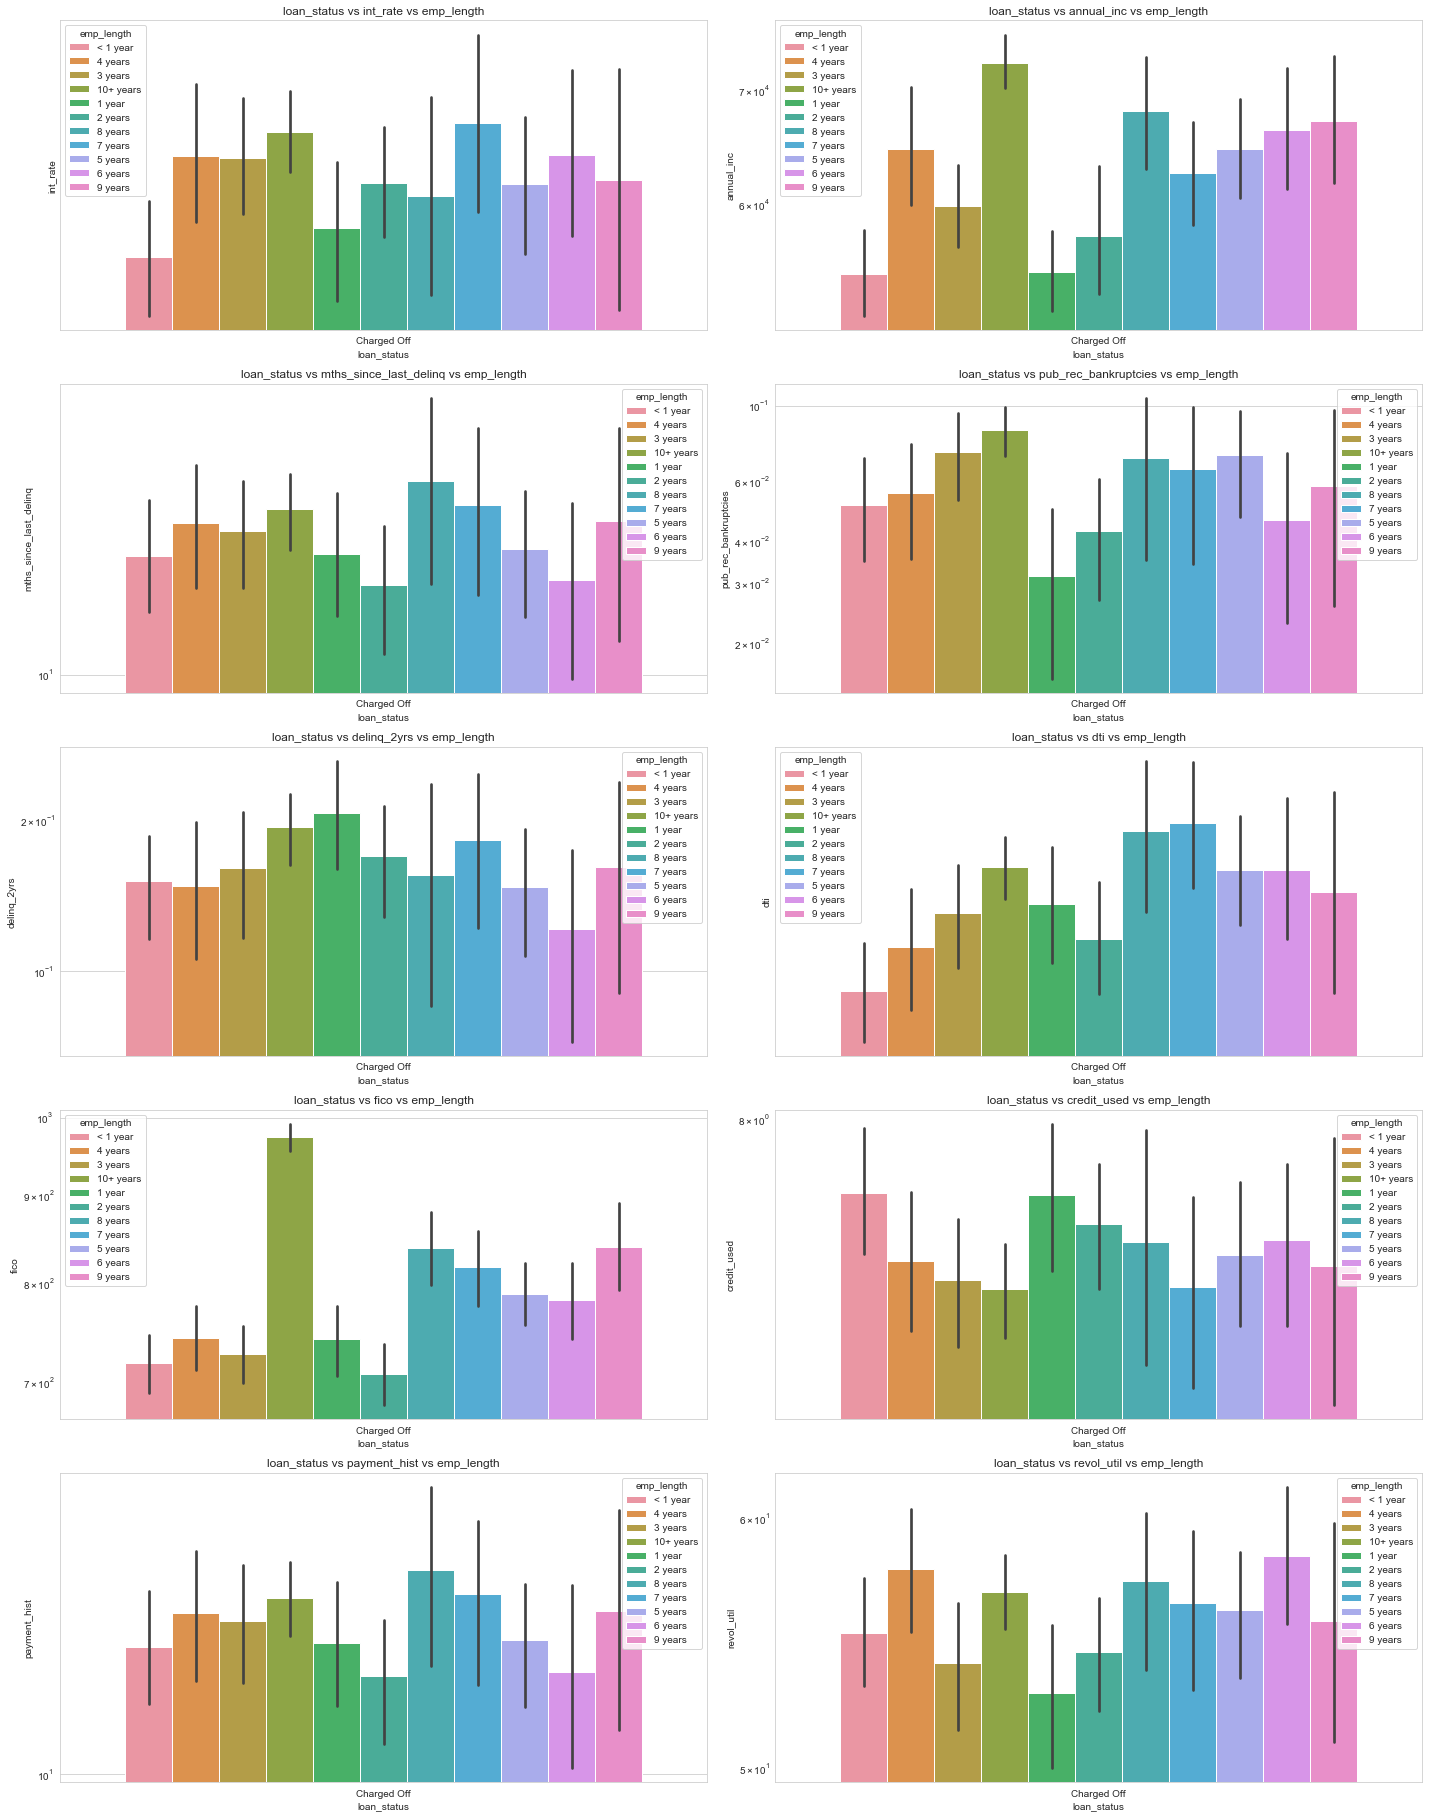

In [160]:
# comparing summary stats across loan_status based on emp_length
nr_rows = 6
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_num_feats = list(li_num_col)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)                        
            sns.barplot(x='loan_status', y=li_num_feats[i],data=loan_default,hue=categorical_feats[2],estimator=np.mean)
            plt.title("loan_status vs " + li_num_feats[i]+" vs "+categorical_feats[2])
            plt.xlabel('loan_status')
            plt.ylabel(li_num_feats[i])  
            plt.yscale('log')
plt.tight_layout()    
plt.show()


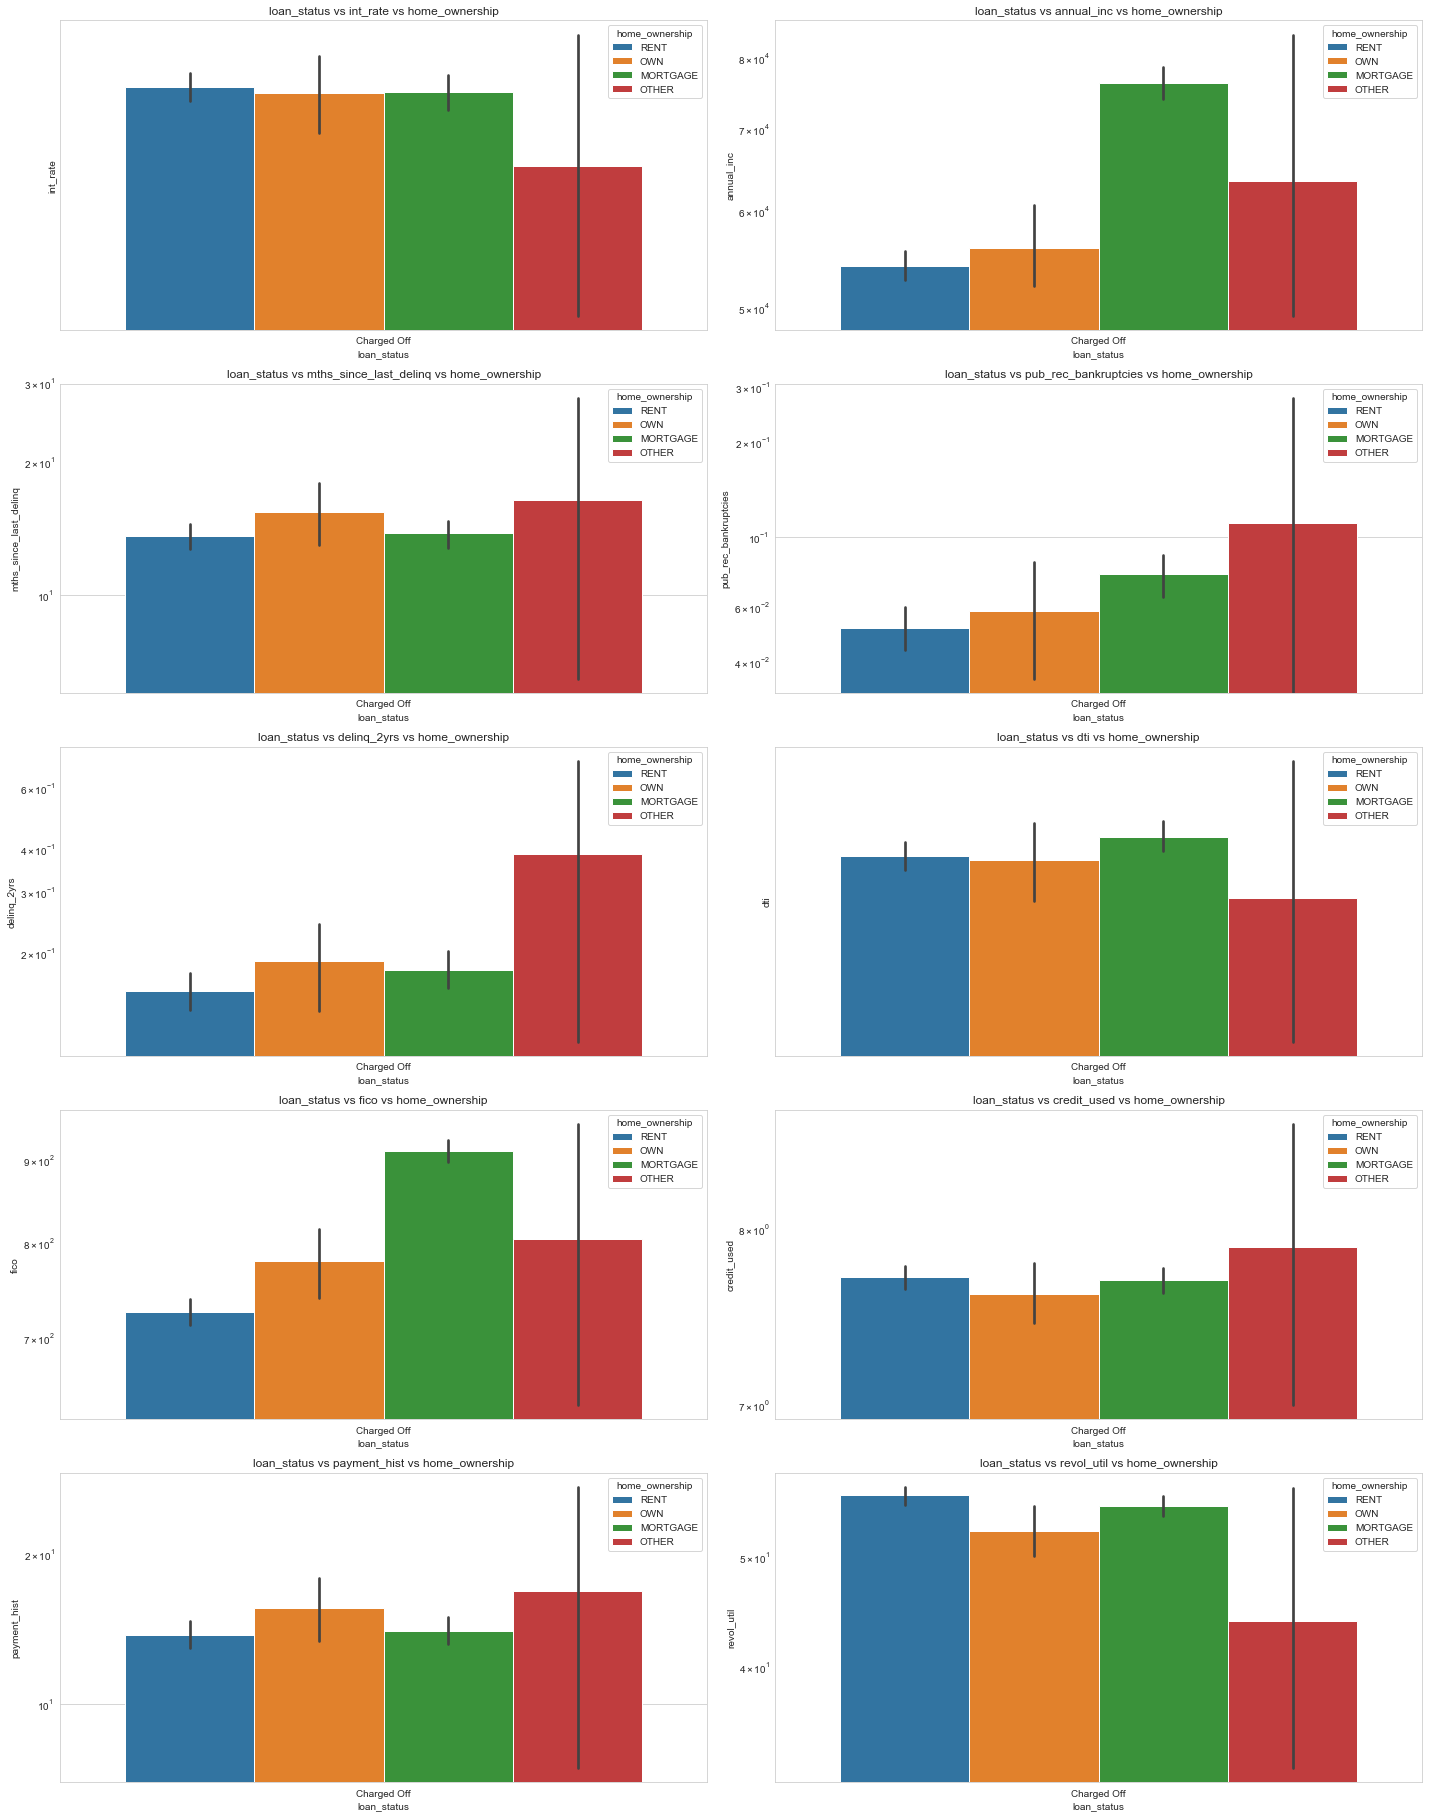

In [161]:
# comparing summary stats across loan_status based on home_ownership
nr_rows = 6
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_num_feats = list(li_num_col)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)                        
            sns.barplot(x='loan_status', y=li_num_feats[i],data=loan_default,hue=categorical_feats[3],estimator=np.mean)
            plt.title("loan_status vs " + li_num_feats[i]+" vs "+categorical_feats[3])
            plt.xlabel('loan_status')
            plt.ylabel(li_num_feats[i])
            plt.yscale('log')
plt.tight_layout()    
plt.show()


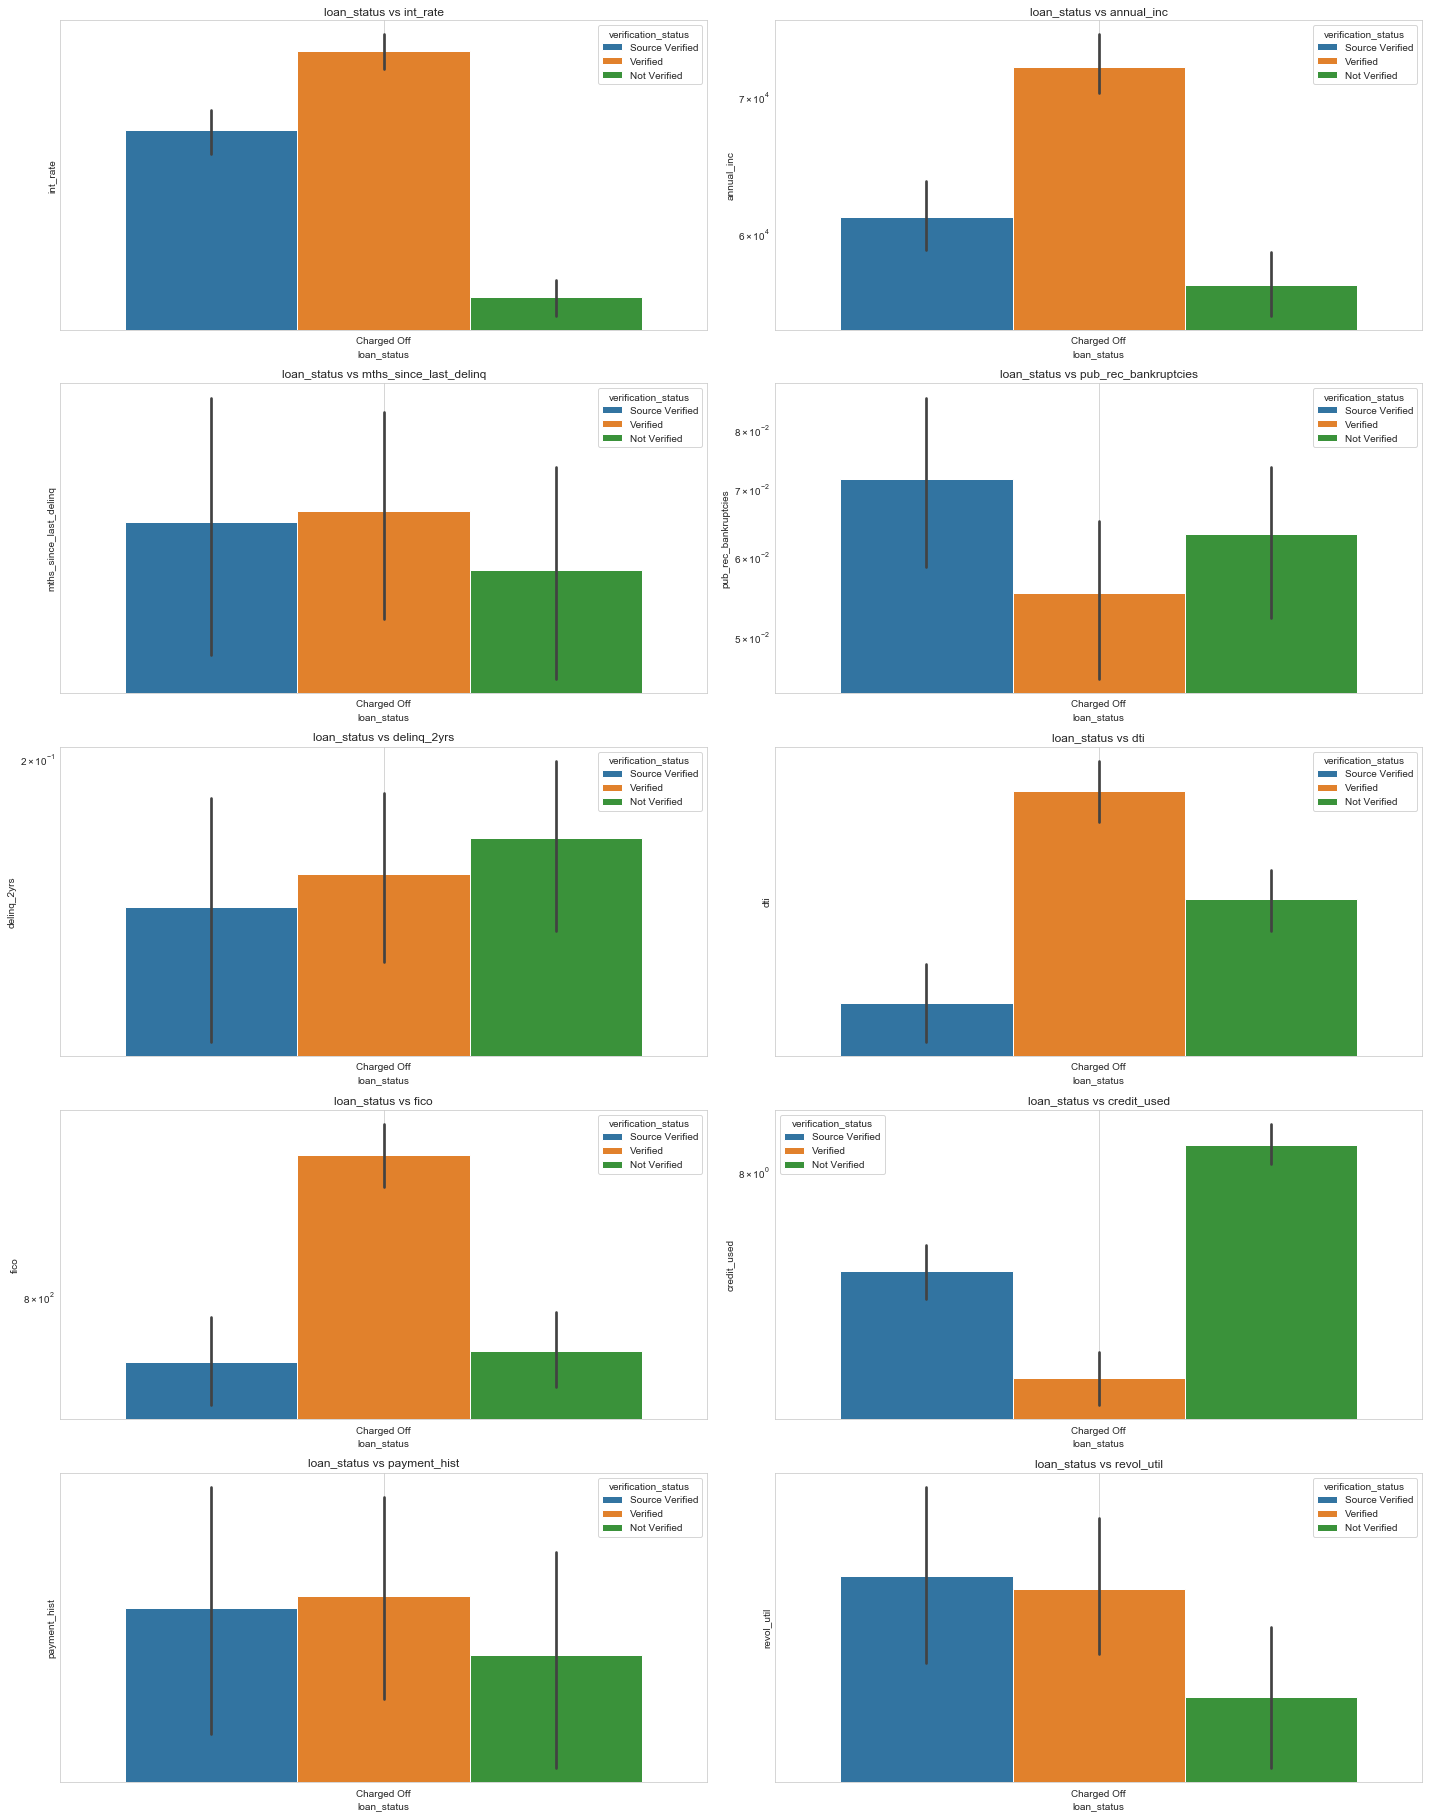

In [162]:
# comparing summary stats across loan_status based on Verification Status
nr_rows = 6
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_num_feats = list(li_num_col)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)                        
            sns.barplot(x='loan_status', y=li_num_feats[i],data=loan_default,hue=categorical_feats[4],estimator=np.mean)
            plt.title("loan_status vs " + li_num_feats[i])
            plt.xlabel('loan_status')
            plt.ylabel(li_num_feats[i])
            plt.yscale('log')
            plt.grid(True)
plt.tight_layout()    
plt.show()


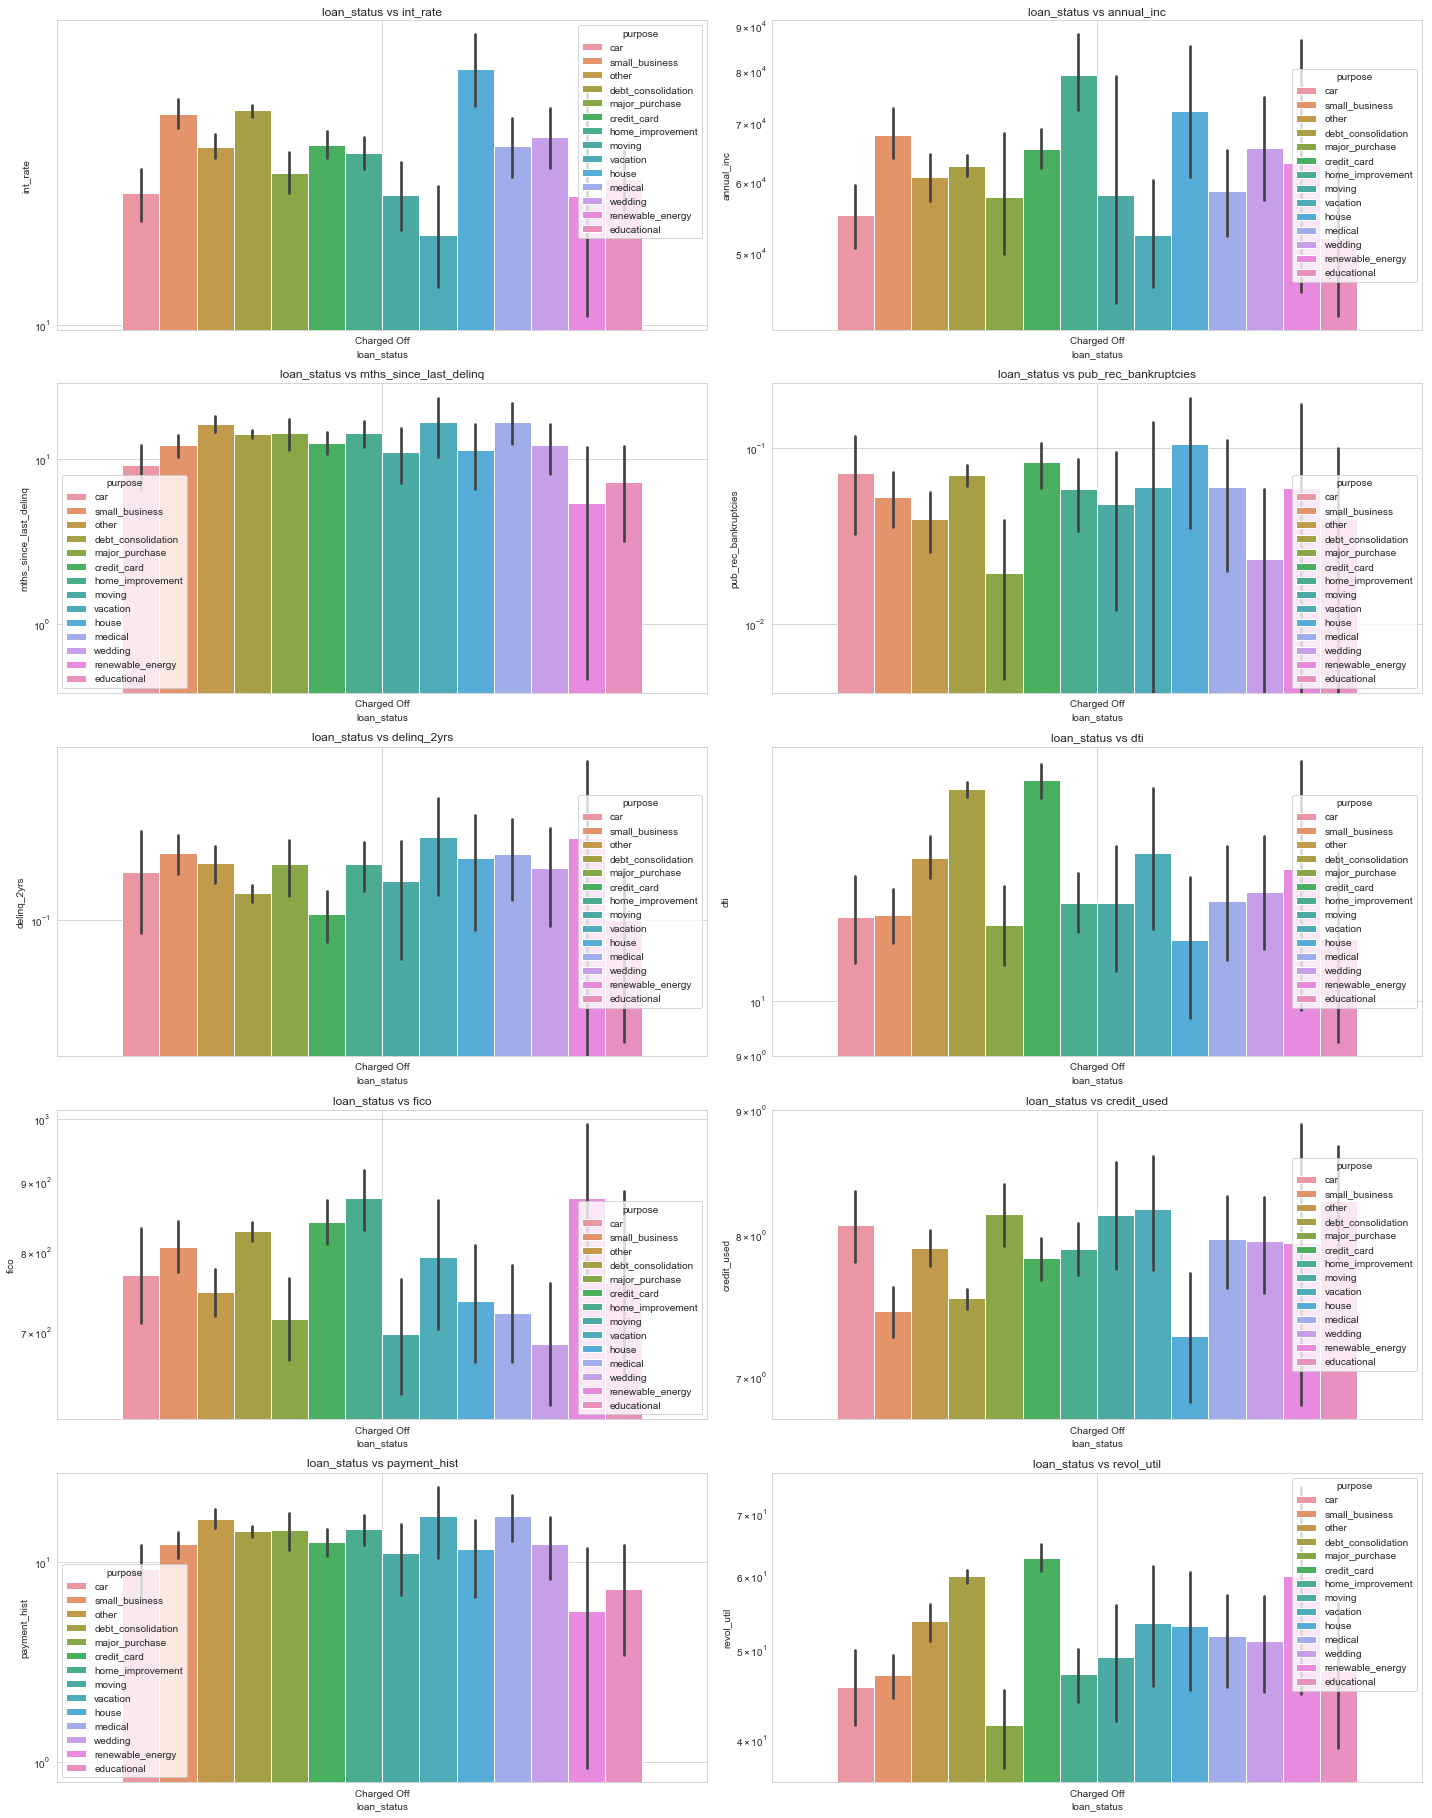

In [163]:
# comparing summary stats across loan_status based on purpose
nr_rows = 6
nr_cols = 2

plt.figure(figsize=(nr_cols*10,nr_rows*5))
li_num_feats = list(li_num_col)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats): 
            plt.subplot(nr_rows, nr_cols, i+1)                        
            sns.barplot(x='loan_status', y=li_num_feats[i],data=loan_default,hue=categorical_feats[6],estimator=np.mean)
            plt.title("loan_status vs " + li_num_feats[i])
            plt.xlabel('loan_status')
            plt.ylabel(li_num_feats[i])
            plt.yscale('log')
            plt.grid(True)
plt.tight_layout()    
plt.show()


### Relationship with FICO score for Charged off loans

In [164]:
## Taking the column with which we need to find FICO relation
target='loan_status_default'

In [165]:
# Varaibles we need to draw graph
li_num_col

['int_rate',
 'annual_inc',
 'mths_since_last_delinq',
 'pub_rec_bankruptcies',
 'delinq_2yrs',
 'dti',
 'fico',
 'credit_used',
 'payment_hist',
 'revol_util']

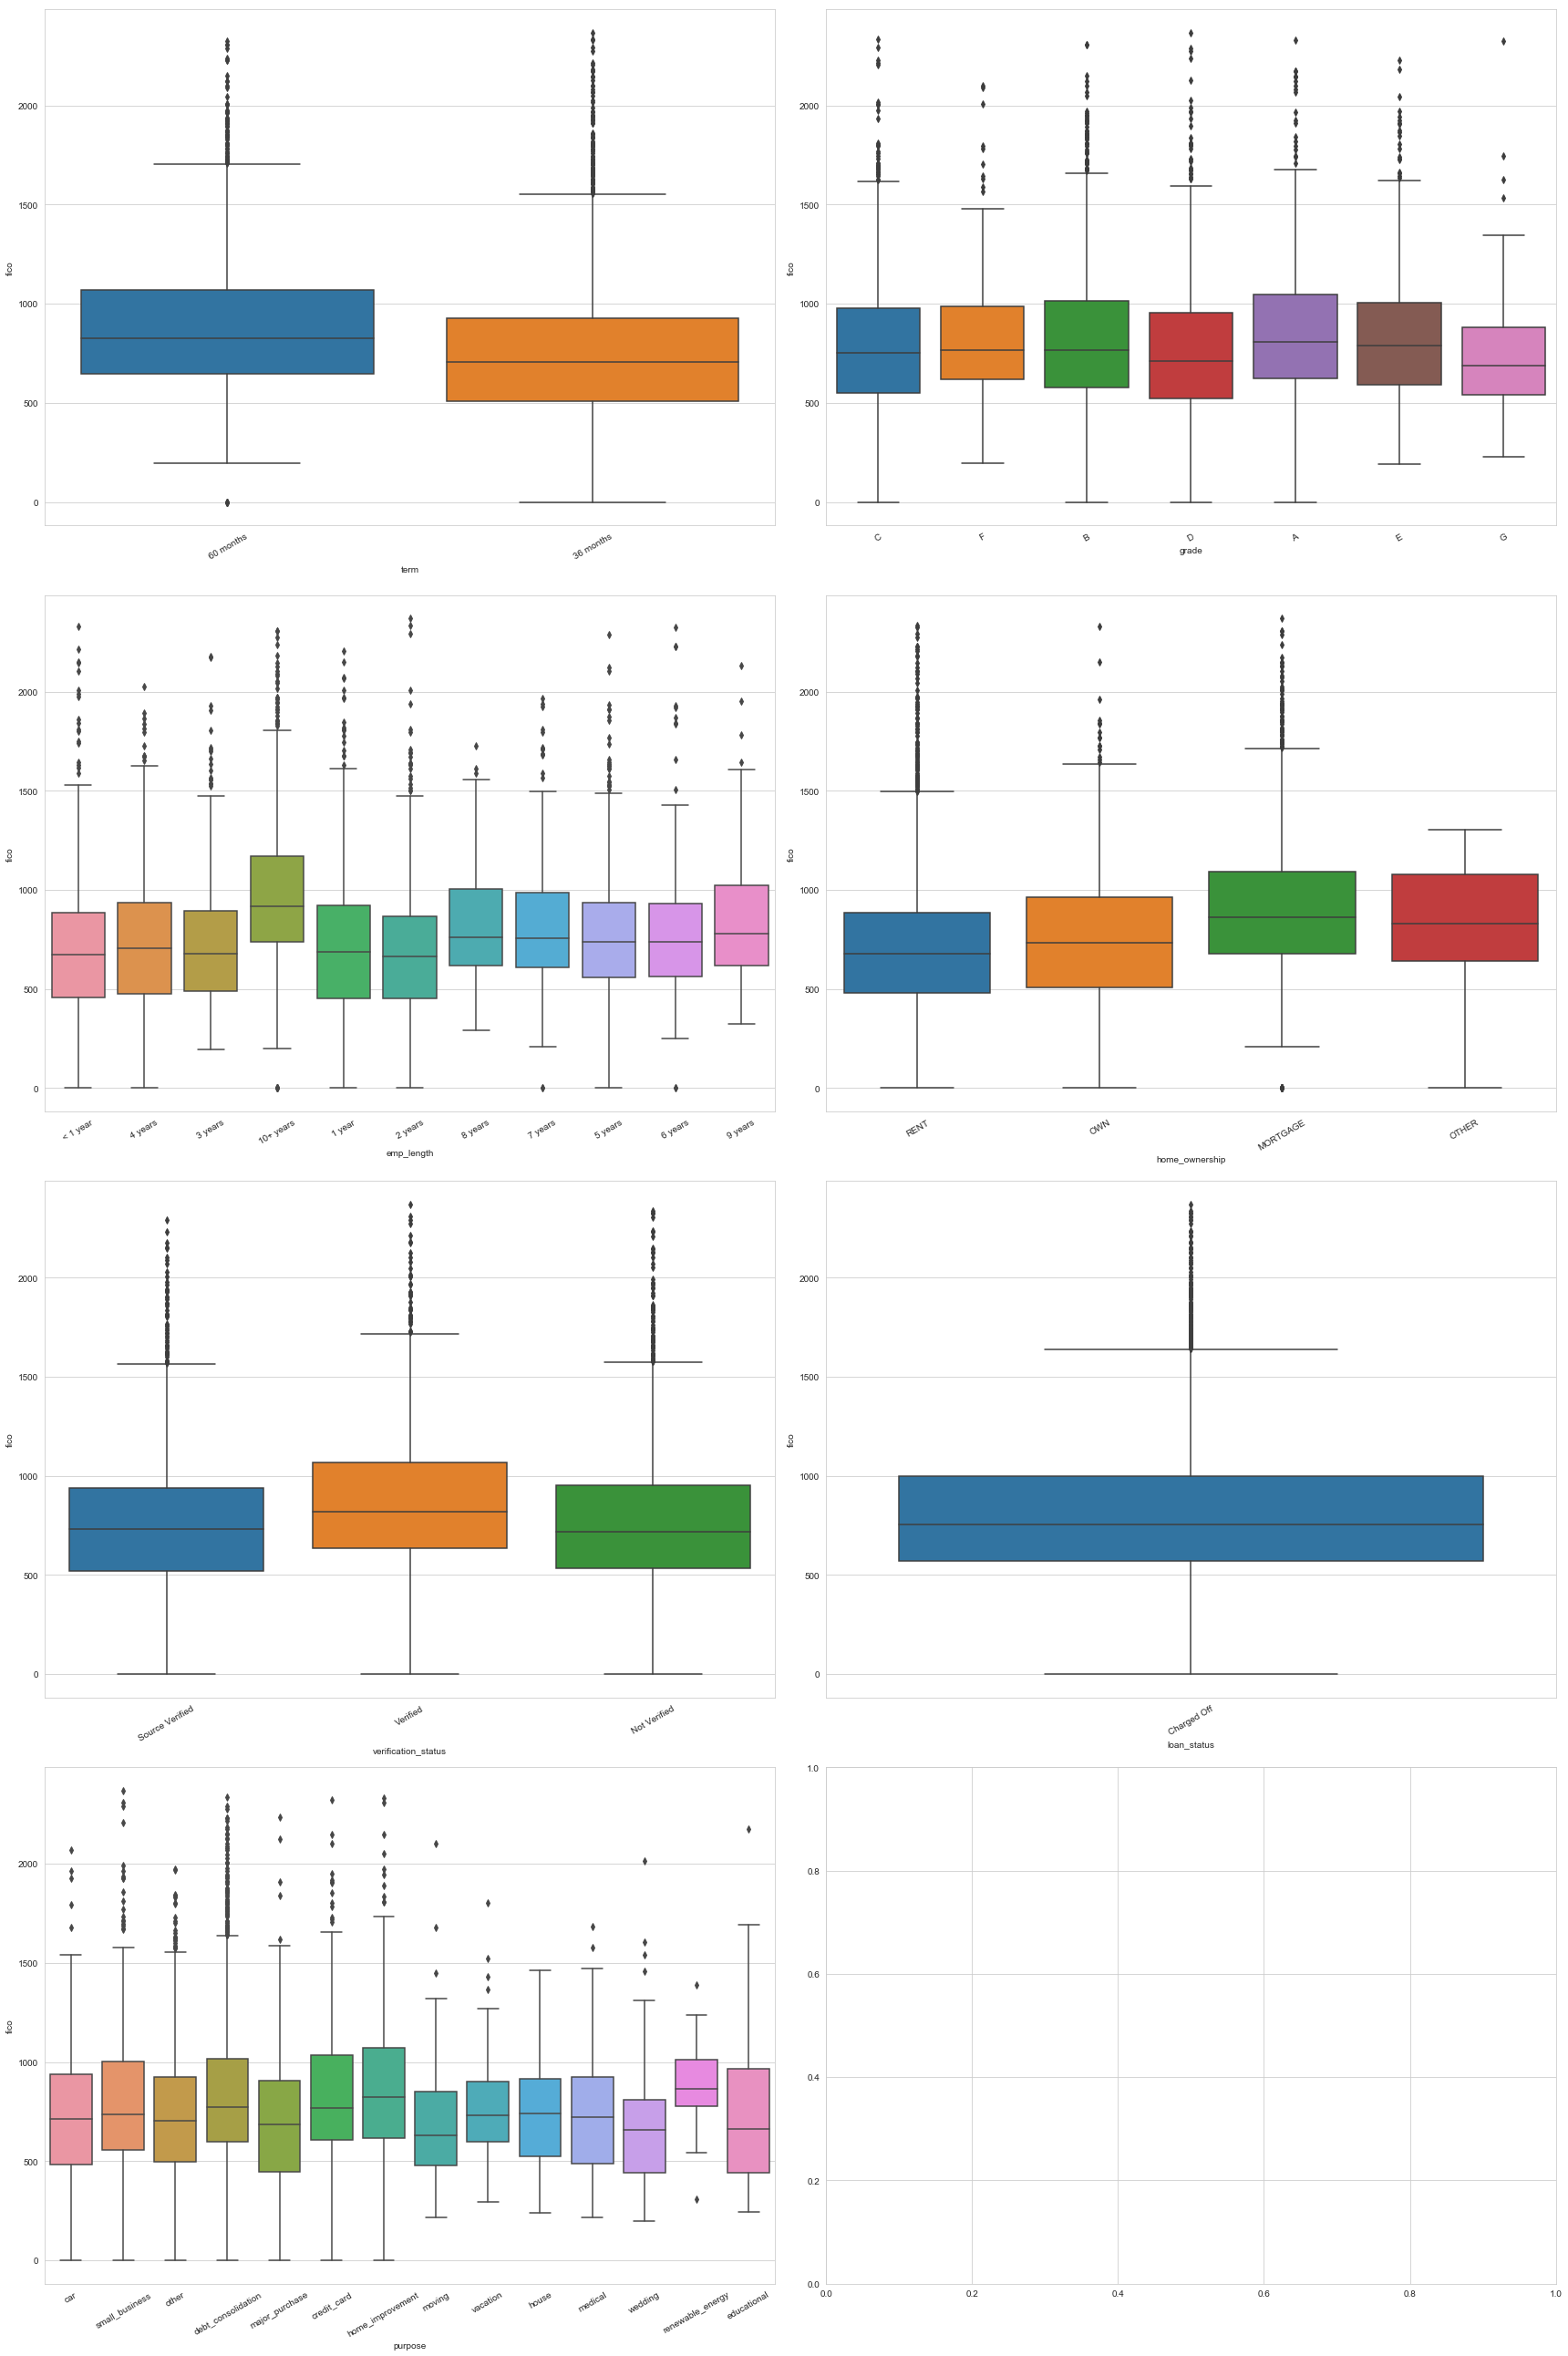

In [166]:
# Plotting graph for each category
li_cat_feats = list(categorical_feats)
nr_rows = 4
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*9))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            p=sns.boxplot(x=li_cat_feats[i], y='fico', data=loan_default, ax = axs[r][c])  
            p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.tight_layout()    
plt.show() 